In [9]:
#Project title: "Analysing the Association Between Air Pollution (PM10 and PM2.5) and Traffic Congestion in Denmark: A Comparative Examination of 2020 and 2022 Using Python" 
#Authors: Paulina Sekuła, Andrzej Sternik
#Data for Air Quality is based on the World Air Quality Index project (https://aqicn.org/)
#Data for Traffic Congestion is based on Vejdirektoratet (https://www.vejdirektoratet.dk/)

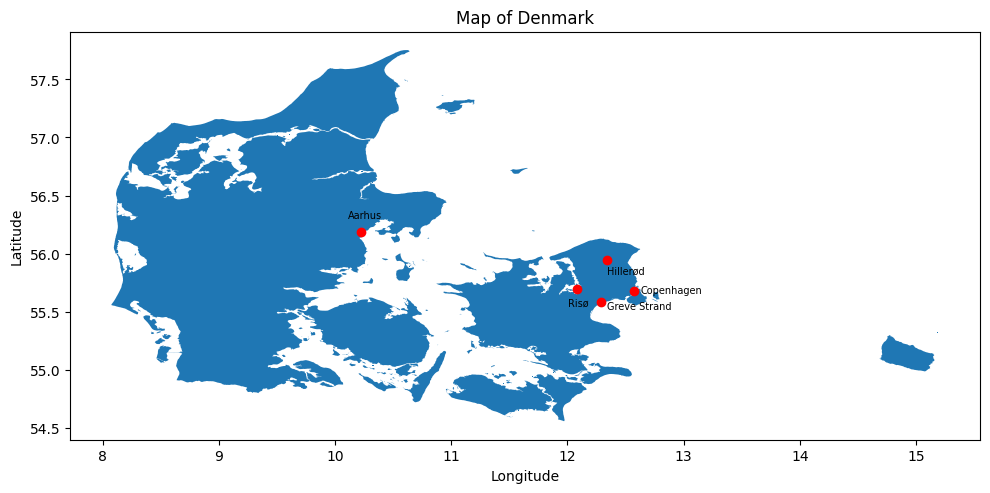

In [60]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Path to the shapefile
shapefile_path = r'C:\Users\andrut\Desktop\Air Quality and Traffic Congestion Analysis in Denmark (between 2020 and 2022)\Shapefile - Denmark\DNK_adm0.shp'

# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax)

# Add any additional styling or customization to the plot
plt.title("Map of Denmark")

# Create DataFrame with station data
df = pd.DataFrame({
    'Stations': ['Greve Strand', 'Aarhus', 'Hillerød', 'Copenhagen', 'Risø'],
    'Latitude': [55.5862665852918, 56.184272301536005, 55.94629205319111, 55.67501792644796, 55.69498773141729],
    'Longitude': [12.288596542328946, 10.22657607633538, 12.340206044818812, 12.569689387376348, 12.08514309456903],
    'xytext': [(4, -5), (-10, 10), (0, -10), (5, -1), (-7, -12)],
    'fontsize': [7, 7, 7, 7, 7],
    'textcolor': ['red', 'blue', 'green', 'purple', 'orange']
})

# Create Point geometry from latitude and longitude
df["Coordinates"] = list(zip(df.Longitude, df.Latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)

# Convert DataFrame to GeoDataFrame
gdf1 = gpd.GeoDataFrame(df, geometry="Coordinates")

# Plot station points
gdf1.plot(ax=ax, color='red', alpha=1)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

for x, y, label, fontsize, xytext in zip(gdf1['Coordinates'].x, gdf1['Coordinates'].y, gdf1['Stations'], gdf1['fontsize'], gdf1['xytext']):
    ax.annotate(label, xy=(x, y), fontsize=fontsize, xytext=xytext, textcoords='offset points')

# Ensure the plot is fully rendered before saving
plt.tight_layout()

# Save the plot as an image file (e.g., PNG)
plt.savefig('denmark_map.pdf')

# Show the plot
plt.show()


In [11]:
import pandas as pd
import folium

df = pd.DataFrame({
    'Stations': ['Greve Strand', 'Aarhus', 'Hillerød', 'Copenhagen', 'Risø'],
    'Latitude': [55.5862665852918, 56.184272301536005, 55.94629205319111, 55.67501792644796, 55.69498773141729],
    'Longitude': [12.288596542328946, 10.22657607633538, 12.340206044818812, 12.569689387376348, 12.08514309456903]
})

m = folium.Map(location=[56, 12], tiles="OpenStreetMap", zoom_start=7)

for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Stations']
    ).add_to(m)

m.save("map.html")
m

In [36]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [12]:
#G1-PM 2.5 (20+22)
#Getting the data 
#1. Bøgehegnet, Greve Strand, Denmark PM 2.5 (2020 + 2022)

# File paths
file_path_1 = r'C:\Users\andrut\Desktop\Air Quality and Traffic Congestion Analysis in Denmark (between 2020 and 2022)\DATA\1. Bøgehegnet, Greve Strand, Denmark PM2.5.txt'

# Read data from file
data = []
with open(file_path_1, 'r') as file1:
    for rec1 in file1:
        date = rec1.split(",")[0]
        pm25 = rec1.split(",")[3]
        data.append([date, pm25])

# Create DataFrame
df1 = pd.DataFrame(data, columns=['date', 'PM 2.5'])

# Data preprocessing
df1 = df1.drop([0], axis=0)
df1['date'] = pd.to_datetime(df1['date'])
df1['date'] = df1['date'].dt.strftime('%Y-%m-%d')
df1.replace(' ', 'NaN', inplace=True)
df1.dropna(inplace=True)

# 2020 year
df1_2020 = df1.loc[(df1['date'] > '2019-12-31') & (df1['date'] < '2021-01-01')]
df1_2020 = df1_2020.sort_values(by='date')
df1_2020 = df1_2020.reset_index(drop=True)
df1_2020.index = df1_2020.index + 1

# 2022 year
df1_2022 = df1.loc[(df1['date'] > '2021-12-31') & (df1['date'] < '2023-01-01')]
df1_2022 = df1_2022.sort_values(by='date')
df1_2022 = df1_2022.reset_index(drop=True)
df1_2022.index = df1_2022.index + 1

# Print DataFrames
print("2020 Year Data:")
print(df1_2020)

print("2022 Year Data:")
print(df1_2022)



2020 Year Data:
           date PM 2.5
1    2020-01-01   2.99
2    2020-01-02  17.07
3    2020-01-03   4.97
4    2020-01-04    2.1
5    2020-01-05   2.85
..          ...    ...
360  2020-12-27   2.49
361  2020-12-28   5.72
362  2020-12-29  10.23
363  2020-12-30   9.48
364  2020-12-31    9.3

[364 rows x 2 columns]
2022 Year Data:
           date PM 2.5
1    2022-01-01   6.85
2    2022-01-02   8.38
3    2022-01-03   3.71
4    2022-01-04   1.52
5    2022-01-05    1.4
..          ...    ...
357  2022-12-27   1.52
358  2022-12-28   2.17
359  2022-12-29   2.02
360  2022-12-30    3.2
361  2022-12-31    3.1

[361 rows x 2 columns]


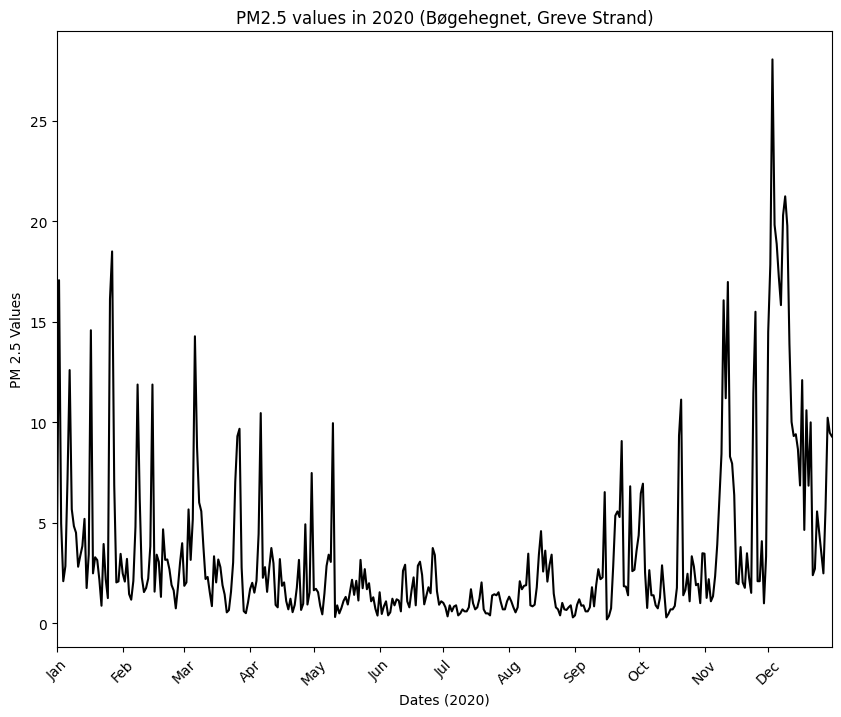

Minimum PM 2.5 value in 2020: 0.20 (Date: 2020-09-16)
Maximum PM 2.5 value in 2020: 28.05 (Date: 2020-12-03)
Median PM 2.5 value in 2020: 2.03


In [66]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# P1-PM 2.5 (20)
# Plotting the data
# 1a. Bøgehegnet, Greve Strand, Denmark PM 2.5 (2020)

df1_2020_dates = pd.to_datetime(df1_2020['date'])
df1_2020_pm25 = df1_2020['PM 2.5'].astype(float)

plt.figure(figsize=(10, 8))
plt.plot(df1_2020_dates, df1_2020_pm25, color="#000000")

plt.title('PM2.5 values in 2020 (Bøgehegnet, Greve Strand)')
plt.xlabel('Dates (2020)')
plt.ylabel('PM 2.5 Values')

df1_2020_months = mdates.MonthLocator()
df1_2020_months_fmt = mdates.DateFormatter('%b')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(df1_2020_months)
plt.gca().xaxis.set_major_formatter(df1_2020_months_fmt)

plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2020-12-31'))

#plt.savefig('df1_2020_pm25.png')

plt.show()

df1_2020_pm25_series = pd.Series(df1_2020_pm25)
df1_2020_pm25_min = df1_2020_pm25_series.min()
df1_2020_pm25_max = df1_2020_pm25_series.max()
df1_2020_pm25_median = round(df1_2020_pm25_series.median(), 2)

df1_2020_min_index = df1_2020_pm25_series.idxmin()
df1_2020_max_index = df1_2020_pm25_series.idxmax()

df1_2020_min_date = df1_2020_dates[df1_2020_min_index]
df1_2020_max_date = df1_2020_dates[df1_2020_max_index]

df1_2020_max_date = pd.to_datetime(df1_2020_max_date).strftime('%Y-%m-%d')
df1_2020_min_date = pd.to_datetime(df1_2020_min_date).strftime('%Y-%m-%d')

print("Minimum PM 2.5 value in 2020: {:.2f} (Date: {})".format(df1_2020_pm25_min, df1_2020_min_date))
print("Maximum PM 2.5 value in 2020: {:.2f} (Date: {})".format(df1_2020_pm25_max, df1_2020_max_date))
print("Median PM 2.5 value in 2020: {:.2f}".format(df1_2020_pm25_median))



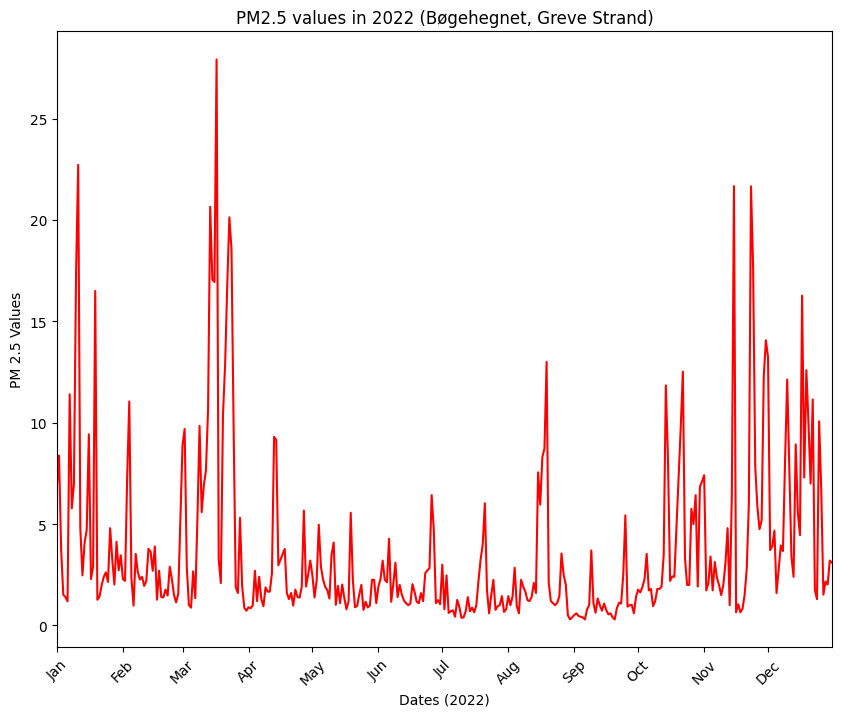

Minimum PM 2.5 value in 2022: 0.30 (Date: 2022-08-30)
Maximum PM 2.5 value in 2022: 27.92 (Date: 2022-03-17)
Median PM 2.5 value in 2022: 2.04


In [67]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# P1-PM 2.5 (22)
# Plotting the data
# 1b. Bøgehegnet, Greve Strand, Denmark PM 2.5 (2022)

df1_2022_dates = pd.to_datetime(df1_2022['date'])
df1_2022_pm25 = df1_2022['PM 2.5'].astype(float)

plt.figure(figsize=(10, 8))
plt.plot(df1_2022_dates, df1_2022_pm25, color="#FF0000")

plt.title('PM2.5 values in 2022 (Bøgehegnet, Greve Strand)')
plt.xlabel('Dates (2022)')
plt.ylabel('PM 2.5 Values')

df1_2022_months = mdates.MonthLocator()
df1_2022_months_fmt = mdates.DateFormatter('%b')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(df1_2022_months)
plt.gca().xaxis.set_major_formatter(df1_2022_months_fmt)

plt.xlim(pd.to_datetime('2022-01-01'), pd.to_datetime('2022-12-31'))

#plt.savefig('df1_2022_pm25.png')

plt.show()

df1_2022_pm25_series = pd.Series(df1_2022_pm25)
df1_2022_pm25_min = df1_2022_pm25_series.min()
df1_2022_pm25_max = df1_2022_pm25_series.max()
df1_2022_pm25_median = round(df1_2022_pm25_series.median(), 2)

df1_2022_min_index = df1_2022_pm25_series.idxmin()
df1_2022_max_index = df1_2022_pm25_series.idxmax()

df1_2022_min_date = df1_2022_dates[df1_2022_min_index]
df1_2022_max_date = df1_2022_dates[df1_2022_max_index]

df1_2022_max_date = pd.to_datetime(df1_2022_max_date).strftime('%Y-%m-%d')
df1_2022_min_date = pd.to_datetime(df1_2022_min_date).strftime('%Y-%m-%d')

print("Minimum PM 2.5 value in 2022: {:.2f} (Date: {})".format(df1_2022_pm25_min, df1_2022_min_date))
print("Maximum PM 2.5 value in 2022: {:.2f} (Date: {})".format(df1_2022_pm25_max, df1_2022_max_date))
print("Median PM 2.5 value in 2022: {:.2f}".format(df1_2022_pm25_median))


In [17]:
# G2-PM 10 (20+22)
# Getting the data
# 2. Bøgehegnet, Greve Strand, Denmark PM 10 (2020 + 2022)

file_path_2 = r'C:\Users\andrut\Desktop\Air Quality and Traffic Congestion Analysis in Denmark (between 2020 and 2022)\DATA\1. Bøgehegnet, Greve Strand, Denmark PM10.txt'

data2 = []
with open(file_path_2, 'r') as file2:
    for rec2 in file2:
        date = rec2.split(",")[0]
        pm10 = rec2.split(",")[3]
        data2.append([date, pm10])

df2 = pd.DataFrame(data2, columns=['date', 'PM 10'])

df2 = df2.drop([0], axis=0)

df2['date'] = pd.to_datetime(df2['date'])
df2['date'] = df2['date'].dt.strftime('%Y-%m-%d')

df2.replace(' ', 'NaN', inplace=True)
df2.dropna(inplace=True)

# 2020 year
df2_2020 = df2.loc[df2['date'] > '2019-12-31']
df2_2020 = df2_2020.loc[df2_2020['date'] < '2021-01-01']
df2_2020 = df2_2020.sort_values(by='date')
df2_2020 = df2_2020.reset_index(drop=True)
df2_2020.index = df2_2020.index + 1

# 2022 year
df2_2022 = df2.loc[df2['date'] > '2021-12-31']
df2_2022 = df2_2022.loc[df2_2022['date'] < '2023-01-01']
df2_2022 = df2_2022.sort_values(by='date')
df2_2022 = df2_2022.reset_index(drop=True)
df2_2022.index = df2_2022.index + 1


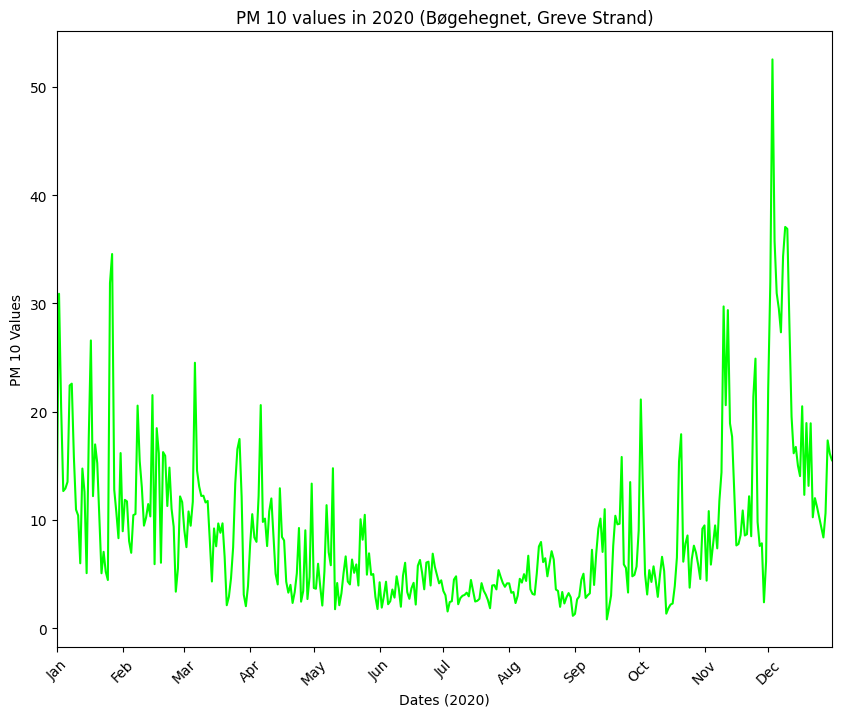

Minimum PM 10 value in 2020: 0.82 (Date: 2020-09-16)
Maximum PM 10 value in 2020: 52.53 (Date: 2020-12-03)
Median PM 10 value in 2020: 6.62


In [68]:
# P2-PM 10 (20)
# Plotting the data
# 2a. Bøgehegnet, Greve Strand, Denmark PM 10 (2020)

df2_2020_dates = pd.to_datetime(df2_2020['date'])
df2_2020_pm10 = df2_2020['PM 10'].astype(float)

plt.figure(figsize=(10, 8))

plt.plot(df2_2020_dates, df2_2020_pm10, color="#00FF00")
plt.title('PM 10 values in 2020 (Bøgehegnet, Greve Strand)')
plt.xlabel('Dates (2020)')
plt.ylabel('PM 10 Values')

df2_2020_months = mdates.MonthLocator()
df2_2020_months_fmt = mdates.DateFormatter('%b')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(df2_2020_months)
plt.gca().xaxis.set_major_formatter(df2_2020_months_fmt)

plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2020-12-31'))

#plt.savefig('df2_2020_pm10.png')

plt.show()

df2_2020_pm10_series = pd.Series(df2_2020_pm10)
df2_2020_pm10_min = df2_2020_pm10_series.min()
df2_2020_pm10_max = df2_2020_pm10_series.max()
df2_2020_pm10_median = round(df2_2020_pm10_series.median(), 2)

df2_2020_min_index = df2_2020_pm10_series.idxmin()
df2_2020_max_index = df2_2020_pm10_series.idxmax()

df2_2020_min_date = df2_2020_dates[df2_2020_min_index]
df2_2020_max_date = df2_2020_dates[df2_2020_max_index]

df2_2020_max_date = pd.to_datetime(df2_2020_max_date).strftime('%Y-%m-%d')
df2_2020_min_date = pd.to_datetime(df2_2020_min_date).strftime('%Y-%m-%d')

print("Minimum PM 10 value in 2020: {:.2f} (Date: {})".format(df2_2020_pm10_min, df2_2020_min_date))
print("Maximum PM 10 value in 2020: {:.2f} (Date: {})".format(df2_2020_pm10_max, df2_2020_max_date))
print("Median PM 10 value in 2020: {:.2f}".format(df2_2020_pm10_median))


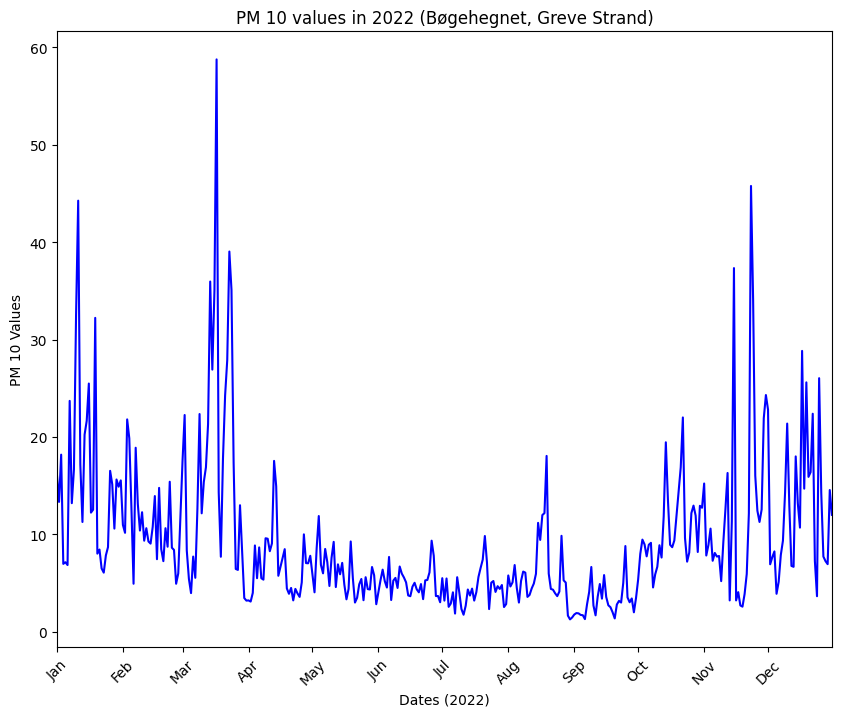

Minimum PM 10 value in 2022: 1.27 (Date: 2022-08-30)
Maximum PM 10 value in 2022: 58.75 (Date: 2022-03-17)
Median PM 10 value in 2022: 7.03


In [69]:
# P2-PM 10 (22)
# Plotting the data
# 2a. Bøgehegnet, Greve Strand, Denmark PM 10 (2022)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# PM 10 (2022)
df2_2022_dates = pd.to_datetime(df2_2022['date'])
df2_2022_pm10 = df2_2022['PM 10'].astype(float)

plt.figure(figsize=(10, 8))

plt.plot(df2_2022_dates, df2_2022_pm10, color="#0000FF")
plt.title('PM 10 values in 2022 (Bøgehegnet, Greve Strand)')
plt.xlabel('Dates (2022)')
plt.ylabel('PM 10 Values')

df2_2022_months = mdates.MonthLocator()
df2_2022_months_fmt = mdates.DateFormatter('%b')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(df2_2022_months)
plt.gca().xaxis.set_major_formatter(df2_2022_months_fmt)

plt.xlim(pd.to_datetime('2022-01-01'), pd.to_datetime('2022-12-31'))

#plt.savefig('df2_2022_pm10.png')

plt.show()

df2_2022_pm10_series = pd.Series(df2_2022_pm10)
df2_2022_pm10_min = df2_2022_pm10_series.min()
df2_2022_pm10_max = df2_2022_pm10_series.max()
df2_2022_pm10_median = round(df2_2022_pm10_series.median(), 2)

df2_2022_min_index = df2_2022_pm10_series.idxmin()
df2_2022_max_index = df2_2022_pm10_series.idxmax()

df2_2022_min_date = df2_2022_dates[df2_2022_min_index]
df2_2022_max_date = df2_2022_dates[df2_2022_max_index]

df2_2022_max_date = pd.to_datetime(df2_2022_max_date).strftime('%Y-%m-%d')
df2_2022_min_date = pd.to_datetime(df2_2022_min_date).strftime('%Y-%m-%d')

print("Minimum PM 10 value in 2022: {:.2f} (Date: {})".format(df2_2022_pm10_min, df2_2022_min_date))
print("Maximum PM 10 value in 2022: {:.2f} (Date: {})".format(df2_2022_pm10_max, df2_2022_max_date))
print("Median PM 10 value in 2022: {:.2f}".format(df2_2022_pm10_median))


In [20]:
# G2-PM 2.5 (20+22)
# Getting the data
# 2. Bøgehegnet, Greve Strand, Denmark PM 2.5 (2020 + 2022)

import pandas as pd

file_path_2 = r'C:\Users\andrut\Desktop\Air Quality and Traffic Congestion Analysis in Denmark (between 2020 and 2022)\DATA\1. Bøgehegnet, Greve Strand, Denmark PM2.5.txt'

data2 = []
with open(file_path_2, 'r') as file2:
    for rec2 in file2:
        date = rec2.split(",")[0]
        pm25 = rec2.split(",")[3]
        data2.append([date, pm25])

df2a = pd.DataFrame(data2, columns=['date', 'PM 2.5'])

df2a = df2a.drop([0], axis=0)

df2a['date'] = pd.to_datetime(df2a['date'])
df2a['date'] = df2a['date'].dt.strftime('%Y-%m-%d')

df2a.replace(' ', 'NaN', inplace=True)
df2a.dropna(inplace=True)

# 2020 year
df2a_2020 = df2a.loc[(df2a['date'] > '2019-12-31') & (df2a['date'] < '2021-01-01')]
df2a_2020 = df2a_2020.sort_values(by='date')
df2a_2020 = df2a_2020.reset_index(drop=True)
df2a_2020.index = df2a_2020.index + 1

# 2022 year
df2a_2022 = df2a.loc[(df2a['date'] > '2021-12-31') & (df2a['date'] < '2023-01-01')]
df2a_2022 = df2a_2022.sort_values(by='date')
df2a_2022 = df2a_2022.reset_index(drop=True)
df2a_2022.index = df2a_2022.index + 1


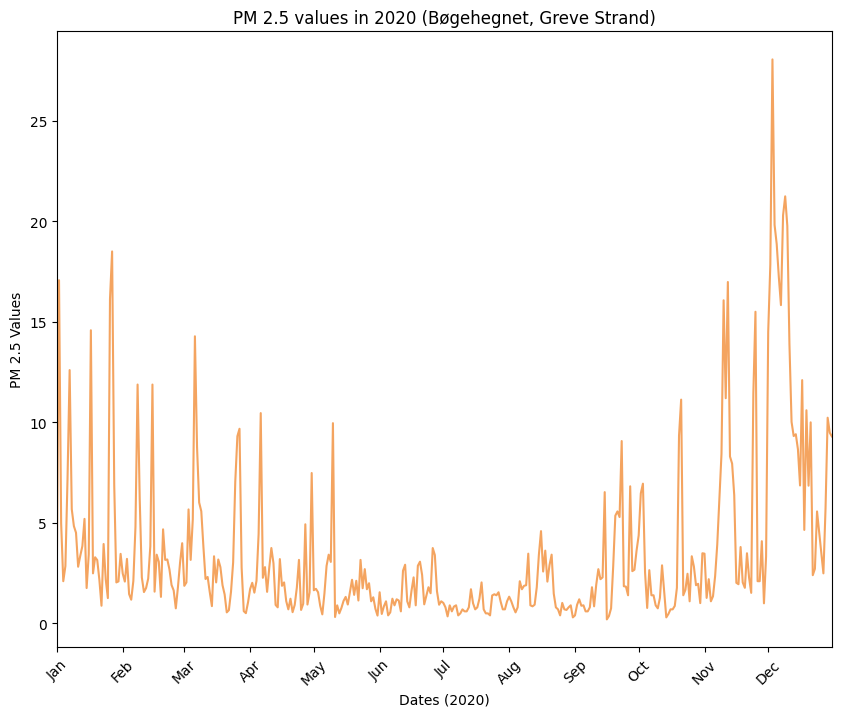

Minimum PM 2.5 value in 2020: 0.20 (Date: 2020-09-16)
Maximum PM 2.5 value in 2020: 28.05 (Date: 2020-12-03)
Median PM 2.5 value in 2020: 2.03


In [70]:
# P2-PM 2.5 (20)
# Plotting the data
# 2a. Bøgehegnet, Greve Strand, Denmark PM 2.5 (2020)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df2a_2020_dates = pd.to_datetime(df2a_2020['date'])
df2a_2020_pm25 = df2a_2020['PM 2.5'].astype(float)

plt.figure(figsize=(10, 8))

plt.plot(df2a_2020_dates, df2a_2020_pm25, color="#F4A460")
plt.title('PM 2.5 values in 2020 (Bøgehegnet, Greve Strand)')
plt.xlabel('Dates (2020)')
plt.ylabel('PM 2.5 Values')

df2a_2020_months = mdates.MonthLocator()
df2a_2020_months_fmt = mdates.DateFormatter('%b')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(df2a_2020_months)
plt.gca().xaxis.set_major_formatter(df2a_2020_months_fmt)

plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2020-12-31'))

#plt.savefig('df2a_2020_pm25.png')

plt.show()

df2a_2020_pm25_series = pd.Series(df2a_2020_pm25)
df2a_2020_pm25_min = df2a_2020_pm25_series.min()
df2a_2020_pm25_max = df2a_2020_pm25_series.max()
df2a_2020_pm25_median = round(df2a_2020_pm25_series.median(), 2)

df2a_2020_min_index = df2a_2020_pm25_series.idxmin()
df2a_2020_max_index = df2a_2020_pm25_series.idxmax()

df2a_2020_min_date = df2a_2020_dates[df2a_2020_min_index]
df2a_2020_max_date = df2a_2020_dates[df2a_2020_max_index]

df2a_2020_max_date = pd.to_datetime(df2a_2020_max_date).strftime('%Y-%m-%d')
df2a_2020_min_date = pd.to_datetime(df2a_2020_min_date).strftime('%Y-%m-%d')

print("Minimum PM 2.5 value in 2020: {:.2f} (Date: {})".format(df2a_2020_pm25_min, df2a_2020_min_date))
print("Maximum PM 2.5 value in 2020: {:.2f} (Date: {})".format(df2a_2020_pm25_max, df2a_2020_max_date))
print("Median PM 2.5 value in 2020: {:.2f}".format(df2a_2020_pm25_median))


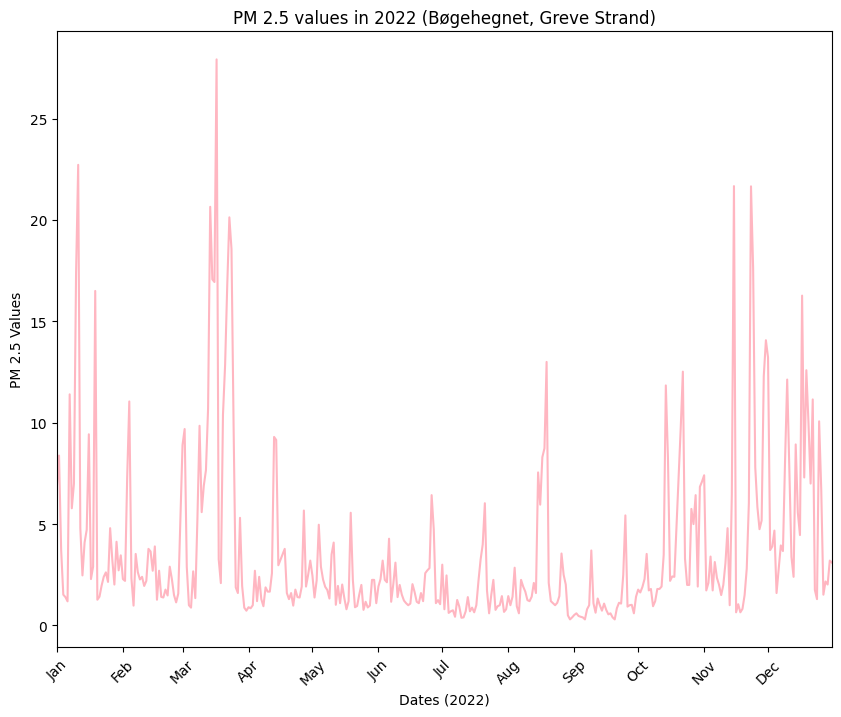

Minimum PM 2.5 value in 2022: 0.30 (Date: 2022-08-30)
Maximum PM 2.5 value in 2022: 27.92 (Date: 2022-03-17)
Median PM 2.5 value in 2022: 2.04


In [71]:
# P2-PM 2.5 (22)
# Plotting the data
# 2a. Bøgehegnet, Greve Strand, Denmark PM 2.5 (2022)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df2a_2022_dates = pd.to_datetime(df2a_2022['date'])
df2a_2022_pm25 = df2a_2022['PM 2.5'].astype(float)

plt.figure(figsize=(10, 8))

plt.plot(df2a_2022_dates, df2a_2022_pm25, color="#FFB6C1")
plt.title('PM 2.5 values in 2022 (Bøgehegnet, Greve Strand)')
plt.xlabel('Dates (2022)')
plt.ylabel('PM 2.5 Values')

df2a_2022_months = mdates.MonthLocator()
df2a_2022_months_fmt = mdates.DateFormatter('%b')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(df2a_2022_months)
plt.gca().xaxis.set_major_formatter(df2a_2022_months_fmt)

plt.xlim(pd.to_datetime('2022-01-01'), pd.to_datetime('2022-12-31'))

#plt.savefig('df2a_2022_pm25.png')

plt.show()

df2a_2022_pm25_series = pd.Series(df2a_2022_pm25)
df2a_2022_pm25_min = df2a_2022_pm25_series.min()
df2a_2022_pm25_max = df2a_2022_pm25_series.max()
df2a_2022_pm25_median = round(df2a_2022_pm25_series.median(), 2)

df2a_2022_min_index = df2a_2022_pm25_series.idxmin()
df2a_2022_max_index = df2a_2022_pm25_series.idxmax()

df2a_2022_min_date = df2a_2022_dates[df2a_2022_min_index]
df2a_2022_max_date = df2a_2022_dates[df2a_2022_max_index]

df2a_2022_max_date = pd.to_datetime(df2a_2022_max_date).strftime('%Y-%m-%d')
df2a_2022_min_date = pd.to_datetime(df2a_2022_min_date).strftime('%Y-%m-%d')

print("Minimum PM 2.5 value in 2022: {:.2f} (Date: {})".format(df2a_2022_pm25_min, df2a_2022_min_date))
print("Maximum PM 2.5 value in 2022: {:.2f} (Date: {})".format(df2a_2022_pm25_max, df2a_2022_max_date))
print("Median PM 2.5 value in 2022: {:.2f}".format(df2a_2022_pm25_median))


In [23]:
# G3-PM 2.5 (20+22)
# Getting the data 
# 3. Egelundsvej10, Aarhus, Denmark PM 2.5 (2020 + 2022)

import pandas as pd

file_path_3 = r'C:\Users\andrut\Desktop\Air Quality and Traffic Congestion Analysis in Denmark (between 2020 and 2022)\DATA\3. Egelundsvej10, Aarhus, Denmark PM2.5.txt'

data3 = []
with open(file_path_3, 'r') as file3:
    for rec3 in file3:
        date = rec3.split(",")[0]
        pm25 = rec3.split(",")[3]
        data3.append([date, pm25])

df3 = pd.DataFrame(data3, columns=['date', 'PM 2.5'])
df3 = df3.drop([0], axis=0)

df3['date'] = pd.to_datetime(df3['date'])
df3['date'] = df3['date'].dt.strftime('%Y-%m-%d')

df3.replace(' ', 'NaN', inplace=True)
df3.dropna(inplace=True)

# 2020 year
df3_2020 = df3.loc[(df3['date'] > '2019-12-31') & (df3['date'] < '2021-01-01')]
df3_2020 = df3_2020.sort_values(by='date')
df3_2020 = df3_2020.reset_index(drop=True)
df3_2020.index = df3_2020.index + 1

# 2022 year
df3_2022 = df3.loc[(df3['date'] > '2021-12-31') & (df3['date'] < '2023-01-01')]
df3_2022 = df3_2022.sort_values(by='date')
df3_2022 = df3_2022.reset_index(drop=True)
df3_2022.index = df3_2022.index + 1


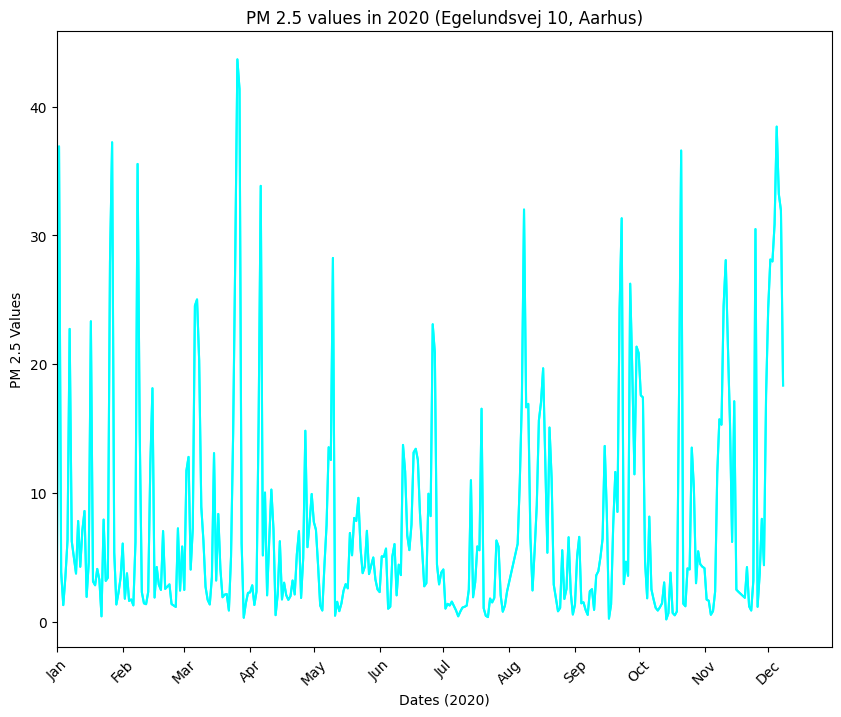

Minimum PM 2.5 value in 2020: 0.17 (Date: 2020-10-13)
Maximum PM 2.5 value in 2020: 43.66 (Date: 2020-03-25)
Median PM 2.5 value in 2020: 4.23


In [72]:
# P3-PM 2.5 (20)
# Plotting the data
# 3a. Egelundsvej 10, Aarhus, Denmark PM 2.5 (2020)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

df3_2020_dates = pd.to_datetime(df3_2020['date'])
df3_2020_pm25 = [float(i) for i in df3_2020['PM 2.5']]

plt.figure(figsize=(10, 8))

plt.plot(df3_2020_dates, df3_2020_pm25, color="#00FFFF")
plt.title('PM 2.5 values in 2020 (Egelundsvej 10, Aarhus)')
plt.xlabel('Dates (2020)')
plt.ylabel('PM 2.5 Values')

df3_2020_months = mdates.MonthLocator()
df3_2020_months_fmt = mdates.DateFormatter('%b')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(df3_2020_months)
plt.gca().xaxis.set_major_formatter(df3_2020_months_fmt)
plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2020-12-31'))

plt.plot(df3_2020_dates, df3_2020_pm25, color="#00FFFF")

#plt.savefig('df3_2020_pm25.png')

plt.show()

df3_2020_pm25_series = pd.Series(df3_2020_pm25)
df3_2020_pm25_min = df3_2020_pm25_series.min()
df3_2020_pm25_max = df3_2020_pm25_series.max()
df3_2020_pm25_median = round(df3_2020_pm25_series.median(), 2)

df3_2020_min_index = df3_2020_pm25_series.idxmin()
df3_2020_max_index = df3_2020_pm25_series.idxmax()

df3_2020_min_date = df3_2020_dates[df3_2020_min_index]
df3_2020_max_date = df3_2020_dates[df3_2020_max_index]

df3_2020_max_date = df3_2020_max_date.strftime('%Y-%m-%d')
df3_2020_min_date = df3_2020_min_date.strftime('%Y-%m-%d')

print("Minimum PM 2.5 value in 2020: {:.2f} (Date: {})".format(df3_2020_pm25_min, df3_2020_min_date))
print("Maximum PM 2.5 value in 2020: {:.2f} (Date: {})".format(df3_2020_pm25_max, df3_2020_max_date))
print("Median PM 2.5 value in 2020: {:.2f}".format(df3_2020_pm25_median))


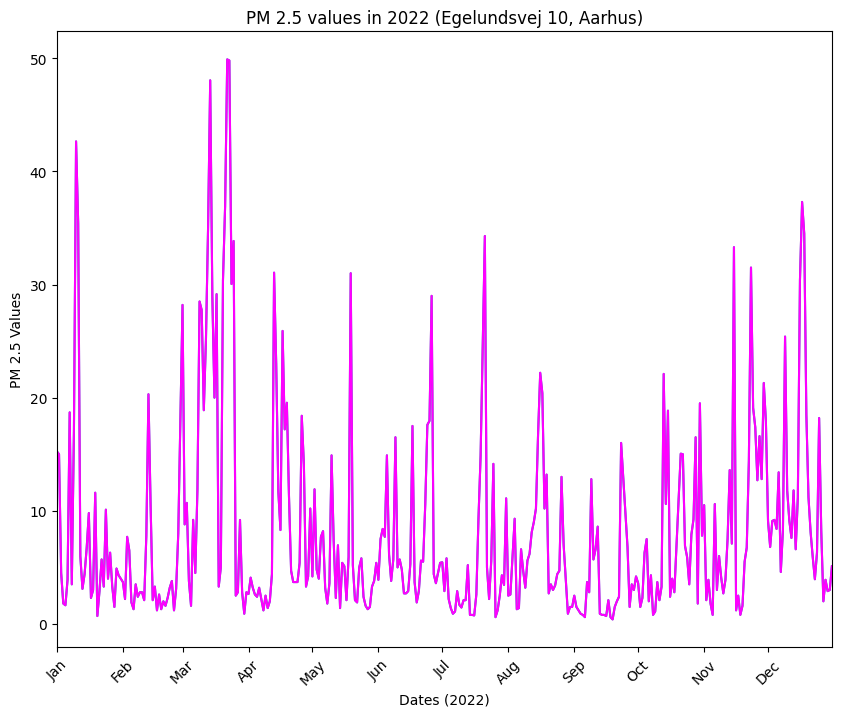

Minimum PM 2.5 value in 2022: 0.40 (Date: 2022-09-18)
Maximum PM 2.5 value in 2022: 49.90 (Date: 2022-03-21)
Median PM 2.5 value in 2022: 4.70


In [73]:
# P3-PM 2.5 (22)
# Plotting the data
# 3b. Egelundsvej 10, Aarhus, Denmark PM 2.5 (2022)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

df3_2022_dates = pd.to_datetime(df3_2022['date'])
df3_2022_pm25 = df3_2022['PM 2.5']
df3_2022_pm25 = [float(i) for i in df3_2022_pm25]

plt.figure(figsize=(10, 8))

plt.plot(df3_2022_dates, df3_2022_pm25)
plt.title('PM 2.5 values in 2022 (Egelundsvej 10, Aarhus)')
plt.xlabel('Dates (2022)')
plt.ylabel('PM 2.5 Values')

df3_2022_months = mdates.MonthLocator()
df3_2022_months_fmt = mdates.DateFormatter('%b')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(df3_2022_months)
plt.gca().xaxis.set_major_formatter(df3_2022_months_fmt)
plt.xlim(pd.to_datetime('2022-01-01'), pd.to_datetime('2022-12-31'))

plt.plot(df3_2022_dates, df3_2022_pm25, color="#FF00FF")
#plt.savefig('df3_2022_pm25.png')
plt.show()

df3_2022_pm25_series = pd.Series(df3_2022_pm25)
df3_2022_pm25_min = df3_2022_pm25_series.min()
df3_2022_pm25_max = df3_2022_pm25_series.max()
df3_2022_pm25_median = round(df3_2022_pm25_series.median(), 2)

df3_2022_min_index = df3_2022_pm25_series.idxmin()
df3_2022_max_index = df3_2022_pm25_series.idxmax()

df3_2022_min_date = df3_2022_dates[df3_2022_min_index]
df3_2022_max_date = df3_2022_dates[df3_2022_max_index]

df3_2022_max_date = pd.to_datetime(df3_2022_max_date).strftime('%Y-%m-%d')
df3_2022_min_date = pd.to_datetime(df3_2022_min_date).strftime('%Y-%m-%d')

print("Minimum PM 2.5 value in 2022: {:.2f} (Date: {})".format(df3_2022_pm25_min, df3_2022_min_date))
print("Maximum PM 2.5 value in 2022: {:.2f} (Date: {})".format(df3_2022_pm25_max, df3_2022_max_date))
print("Median PM 2.5 value in 2022: {:.2f}".format(df3_2022_pm25_median))


In [26]:
# G4-PM 2.5 (20+22)
# Getting the data
# 4. Hillerød ab38, Denmark PM 2.5 (2020 + 2022)

import pandas as pd

file_path_4 = r'C:\Users\andrut\Desktop\Air Quality and Traffic Congestion Analysis in Denmark (between 2020 and 2022)\DATA\4. Hillerød ab38, Denmark PM2.5.txt'

data4 = []
with open(file_path_4, 'r') as file4:
    for rec4 in file4:
        date = rec4.split(",")[0]
        pm25 = rec4.split(",")[3]
        data4.append([date, pm25])

df4 = pd.DataFrame(data4, columns=['date', 'PM 2.5'])

df4 = df4.drop([0], axis=0)

df4['date'] = pd.to_datetime(df4['date'])
df4['date'] = df4['date'].dt.strftime('%Y-%m-%d')

df4.replace(' ', 'NaN', inplace=True)
df4.dropna(inplace=True)

# 2020
df4_2020 = df4.loc[df4['date'] > '2019-12-31']
df4_2020 = df4_2020.loc[df4_2020['date'] < '2021-01-01']
df4_2020 = df4_2020.sort_values(by='date')
df4_2020 = df4_2020.reset_index(drop=True)
df4_2020.index = df4_2020.index + 1

# 2022
df4_2022 = df4.loc[df4['date'] > '2021-12-31']
df4_2022 = df4_2022.loc[df4_2022['date'] < '2023-01-01']
df4_2022 = df4_2022.sort_values(by='date')
df4_2022 = df4_2022.reset_index(drop=True)
df4_2022.index = df4_2022.index + 1
# df4_2022


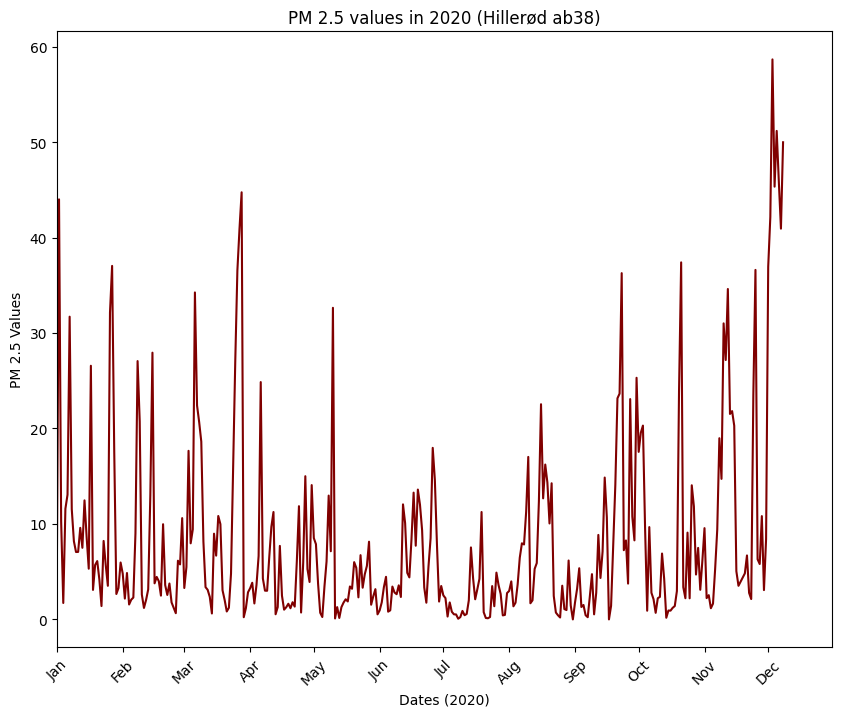

Minimum PM 2.5 value in 2020: 0.00 (Date: 2020-08-30)
Maximum PM 2.5 value in 2020: 58.66 (Date: 2020-12-02)
Median PM 2.5 value in 2020: 4.45


In [74]:
# P4-PM 2.5 (20)
# Plotting the data
# 4a. Hillerød ab38, Denmark PM 2.5 (2020)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df4_2020_dates = pd.to_datetime(df4_2020['date'])
df4_2020_pm25 = df4_2020['PM 2.5']
df4_2020_pm25 = [float(i) for i in df4_2020_pm25]

plt.figure(figsize=(10, 8))

plt.plot(df4_2020_dates, df4_2020_pm25, color="maroon")
plt.title('PM 2.5 values in 2020 (Hillerød ab38)')
plt.xlabel('Dates (2020)')
plt.ylabel('PM 2.5 Values')

df4_2020_months = mdates.MonthLocator() 
df4_2020_months_fmt = mdates.DateFormatter('%b') 

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(df4_2020_months)
plt.gca().xaxis.set_major_formatter(df4_2020_months_fmt)

plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2020-12-31'))  

#plt.savefig('df4_2020_pm25.png')

plt.show()

df4_2020_pm25_series = pd.Series(df4_2020_pm25)
df4_2020_pm25_min = df4_2020_pm25_series.min()
df4_2020_pm25_max = df4_2020_pm25_series.max()
df4_2020_pm25_median = round(df4_2020_pm25_series.median(), 2)

df4_2020_min_index = df4_2020_pm25_series.idxmin()
df4_2020_max_index = df4_2020_pm25_series.idxmax()

df4_2020_min_date = df4_2020_dates[df4_2020_min_index]
df4_2020_max_date = df4_2020_dates[df4_2020_max_index]

df4_2020_max_date = pd.to_datetime(df4_2020_max_date).strftime('%Y-%m-%d')
df4_2020_min_date = pd.to_datetime(df4_2020_min_date).strftime('%Y-%m-%d')

print("Minimum PM 2.5 value in 2020: {:.2f} (Date: {})".format(df4_2020_pm25_min, df4_2020_min_date))
print("Maximum PM 2.5 value in 2020: {:.2f} (Date: {})".format(df4_2020_pm25_max, df4_2020_max_date))
print("Median PM 2.5 value in 2020: {:.2f}".format(df4_2020_pm25_median))


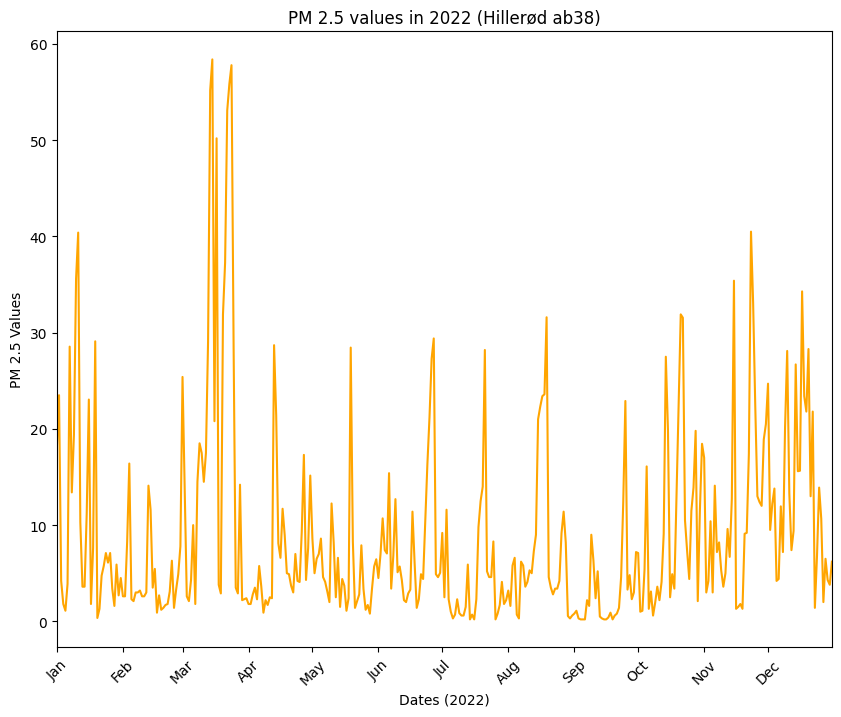

Minimum PM 2.5 value in 2022: 0.20 (Date: 2022-07-13)
Maximum PM 2.5 value in 2022: 58.40 (Date: 2022-03-14)
Median PM 2.5 value in 2022: 4.90


In [75]:
# P4-PM 2.5 (22)
# Plotting the data
# 4a. Hillerød ab38, Denmark PM 2.5 (2022)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df4_2022_dates = pd.to_datetime(df4_2022['date'])
df4_2022_pm25 = df4_2022['PM 2.5']
df4_2022_pm25 = [float(i) for i in df4_2022_pm25]

plt.figure(figsize=(10, 8))

plt.plot(df4_2022_dates, df4_2022_pm25, color="orange")
plt.title('PM 2.5 values in 2022 (Hillerød ab38)')
plt.xlabel('Dates (2022)')
plt.ylabel('PM 2.5 Values')

df4_2022_months = mdates.MonthLocator()
df4_2022_months_fmt = mdates.DateFormatter('%b')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(df4_2022_months)
plt.gca().xaxis.set_major_formatter(df4_2022_months_fmt)

plt.xlim(pd.to_datetime('2022-01-01'), pd.to_datetime('2022-12-31'))

#plt.savefig('df4_2022_pm25.png')

plt.show()

df4_2022_pm25_series = pd.Series(df4_2022_pm25)
df4_2022_pm25_min = df4_2022_pm25_series.min()
df4_2022_pm25_max = df4_2022_pm25_series.max()
df4_2022_pm25_median = round(df4_2022_pm25_series.median(), 2)

df4_2022_min_index = df4_2022_pm25_series.idxmin()
df4_2022_max_index = df4_2022_pm25_series.idxmax()

df4_2022_min_date = df4_2022_dates[df4_2022_min_index]
df4_2022_max_date = df4_2022_dates[df4_2022_max_index]

df4_2022_max_date = pd.to_datetime(df4_2022_max_date).strftime('%Y-%m-%d')
df4_2022_min_date = pd.to_datetime(df4_2022_min_date).strftime('%Y-%m-%d')

print("Minimum PM 2.5 value in 2022: {:.2f} (Date: {})".format(df4_2022_pm25_min, df4_2022_min_date))
print("Maximum PM 2.5 value in 2022: {:.2f} (Date: {})".format(df4_2022_pm25_max, df4_2022_max_date))
print("Median PM 2.5 value in 2022: {:.2f}".format(df4_2022_pm25_median))


In [29]:
# G5-PM (2.5 + PM 10) (20)
# Getting the data
# 5. Copenhagen, Denmark (PM2.5 + PM10) - 2020 year

import pandas as pd

file_path_5 = r'C:\Users\andrut\Desktop\Air Quality and Traffic Congestion Analysis in Denmark (between 2020 and 2022)\DATA\5. Copenhagen, Denmark (PM2.5 + PM10).csv'

data5 = pd.read_csv(file_path_5)

data5 = data5.rename(columns={
    " pm25": "PM 2.5",
    " pm10": "PM 10",
    " o3": "o3",
    ' no2': 'no2',
    ' so2': 'so2',
    ' co': 'co'
})

data5['date'] = pd.to_datetime(data5.date)

data55 = data5.loc[data5['date'] > '2019-12-31']
data55 = data55.loc[data5['date'] < '2021-01-01']
data55 = data55.sort_values(by='date')

data55.replace(' ', 'NaN', inplace=True)
data55.dropna(inplace=True)

data55 = data55.drop(["o3", "no2", "so2", "co"], axis=1)
data55 = data55.reset_index(drop=True)
data55.index = data55.index + 1

# Extracting date + PM2.5 in 2020
data55_pm25_2020 = data55.drop(["PM 10"], axis=1)

# Extracting date + PM10 in 2020
data55_pm10_2020 = data55.drop(["PM 2.5"], axis=1)


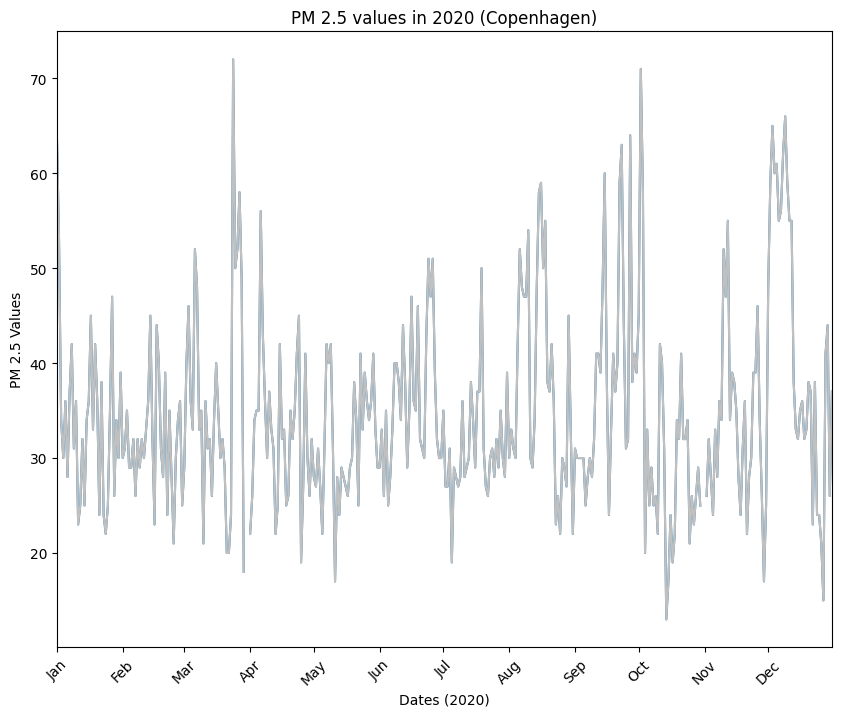

Minimum PM 2.5 value in 2020: 13.00 (Date: 2020-10-13)
Maximum PM 2.5 value in 2020: 72.00 (Date: 2020-03-23)
Median PM 2.5 value in 2020: 33.00


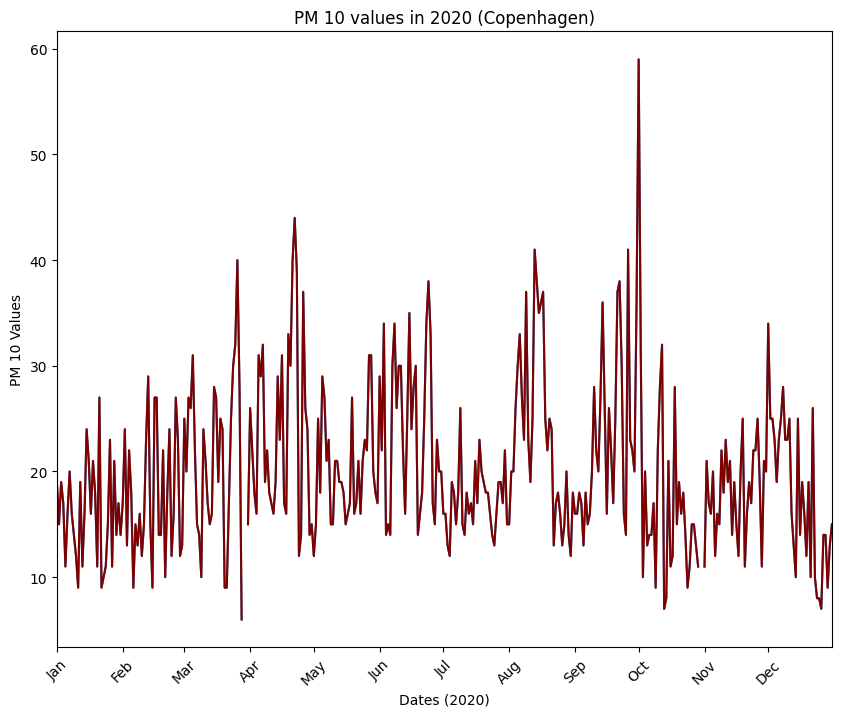

Minimum PM 10 value in 2020: 6.00 (Date: 2020-03-27)
Maximum PM 10 value in 2020: 59.00 (Date: 2020-09-30)
Median PM 10 value in 2020: 19.00


In [76]:
# P5-PM 2.5 (20) + PM 10 (20)

# Plotting the data

# 5a. Copenhagen, Denmark (PM2.5) - 2020 year
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df5_2020_dates = pd.to_datetime(data55_pm25_2020['date'])
df5_2020_pm25 = data55_pm25_2020['PM 2.5']
df5_2020_pm25 = [float(i) for i in df5_2020_pm25]

plt.figure(figsize=(10, 8))

plt.plot(df5_2020_dates, df5_2020_pm25)
plt.title('PM 2.5 values in 2020 (Copenhagen)')
plt.xlabel('Dates (2020)')
plt.ylabel('PM 2.5 Values')

df5_2020_months = mdates.MonthLocator()
df5_2020_months_fmt = mdates.DateFormatter('%b')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(df5_2020_months)
plt.gca().xaxis.set_major_formatter(df5_2020_months_fmt)

plt.plot(df5_2020_dates, df5_2020_pm25, color="#C0C0C0")
plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2020-12-31'))
#plt.savefig('df5_2020_pm25.png')
plt.show()

df5_2020_pm25_series = pd.Series(df5_2020_pm25)

df5_2020_pm25_min = df5_2020_pm25_series.min()
df5_2020_pm25_max = df5_2020_pm25_series.max()
df5_2020_pm25_median = round(df5_2020_pm25_series.median(), 2)

df5_2020_min_index = df5_2020_pm25_series.idxmin()
df5_2020_max_index = df5_2020_pm25_series.idxmax()

df5_2020_min_date = df5_2020_dates[df5_2020_min_index]
df5_2020_max_date = df5_2020_dates[df5_2020_max_index]

df5_2020_max_date = pd.to_datetime(df5_2020_max_date).strftime('%Y-%m-%d')
df5_2020_min_date = pd.to_datetime(df5_2020_min_date).strftime('%Y-%m-%d')

print("Minimum PM 2.5 value in 2020: {:.2f} (Date: {})".format(df5_2020_pm25_min, df5_2020_min_date))
print("Maximum PM 2.5 value in 2020: {:.2f} (Date: {})".format(df5_2020_pm25_max, df5_2020_max_date))
print("Median PM 2.5 value in 2020: {:.2f}".format(df5_2020_pm25_median))

# 5b. Copenhagen, Denmark (PM 10) - 2020 year

df5_2020_dates = pd.to_datetime(data55_pm10_2020["date"])
df5_2020_pm10 = data55_pm10_2020["PM 10"]
df5_2020_pm10 = [float(i) for i in df5_2020_pm10]

plt.figure(figsize=(10, 8))
plt.plot(df5_2020_dates, df5_2020_pm10)
plt.title('PM 10 values in 2020 (Copenhagen)')
plt.xlabel('Dates (2020)')
plt.ylabel('PM 10 Values')

df5_2020_months = mdates.MonthLocator()
df5_2020_months_fmt = mdates.DateFormatter('%b')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(df5_2020_months)
plt.gca().xaxis.set_major_formatter(df5_2020_months_fmt)

plt.plot(df5_2020_dates, df5_2020_pm10, color="#800000")
plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2020-12-31'))
#plt.savefig('df5_2020_pm10.png')
plt.show()

df5_2020_pm10_series = pd.Series(df5_2020_pm10)

df5_2020_pm10_min = df5_2020_pm10_series.min()
df5_2020_pm10_max = df5_2020_pm10_series.max()
df5_2020_pm10_median = round(df5_2020_pm10_series.median(), 2)

df5_2020_min_index = df5_2020_pm10_series.idxmin()
df5_2020_max_index = df5_2020_pm10_series.idxmax()

df5_2020_min_date = df5_2020_dates[df5_2020_min_index]
df5_2020_max_date = df5_2020_dates[df5_2020_max_index]

df5_2020_max_date = pd.to_datetime(df5_2020_max_date).strftime('%Y-%m-%d')
df5_2020_min_date = pd.to_datetime(df5_2020_min_date).strftime('%Y-%m-%d')

print("Minimum PM 10 value in 2020: {:.2f} (Date: {})".format(df5_2020_pm10_min, df5_2020_min_date))
print("Maximum PM 10 value in 2020: {:.2f} (Date: {})".format(df5_2020_pm10_max, df5_2020_max_date))
print("Median PM 10 value in 2020: {:.2f}".format(df5_2020_pm10_median))


In [31]:
# G5-PM (2.5 + PM 10) (22)
# Getting the data

# 5-2. Copenhagen, Denmark (PM2.5 + PM10) - 2022 year

file_path_5a = r'C:\Users\andrut\Desktop\Air Quality and Traffic Congestion Analysis in Denmark (between 2020 and 2022)\DATA\5. Copenhagen, Denmark (PM2.5 + PM10).csv'

data5a = pd.read_csv(file_path_5a)

data5a = data5a.rename(columns={" pm25": "PM 2.5",
                               " pm10": "PM 10",
                               " o3": "o3",
                               " no2": "no2",
                               " so2": "so2",
                               " co": "co"})

data5a['date'] = pd.to_datetime(data5a.date)

data55a = data5a.loc[data5a['date'] > '2021-12-31']
data55a = data55a.loc[data5a['date'] < '2023-01-01']
data55a = data55a.sort_values(by='date')

data55a.replace(' ', 'NaN', inplace=True)
data55a.dropna(inplace=True)

data55a = data55a.drop(["o3", "no2", "so2", "co"], axis=1)
data55a = data55a.reset_index(drop=True)
data55a.index = data55a.index + 1
data55a

# Extracting date + PM2.5 in 2022
data55a_pm25_2022 = data55a.drop(["PM 10"], axis=1)

# Extracting date + PM10 in 2022
data55a_pm10_2022 = data55a.drop(["PM 2.5"], axis=1)


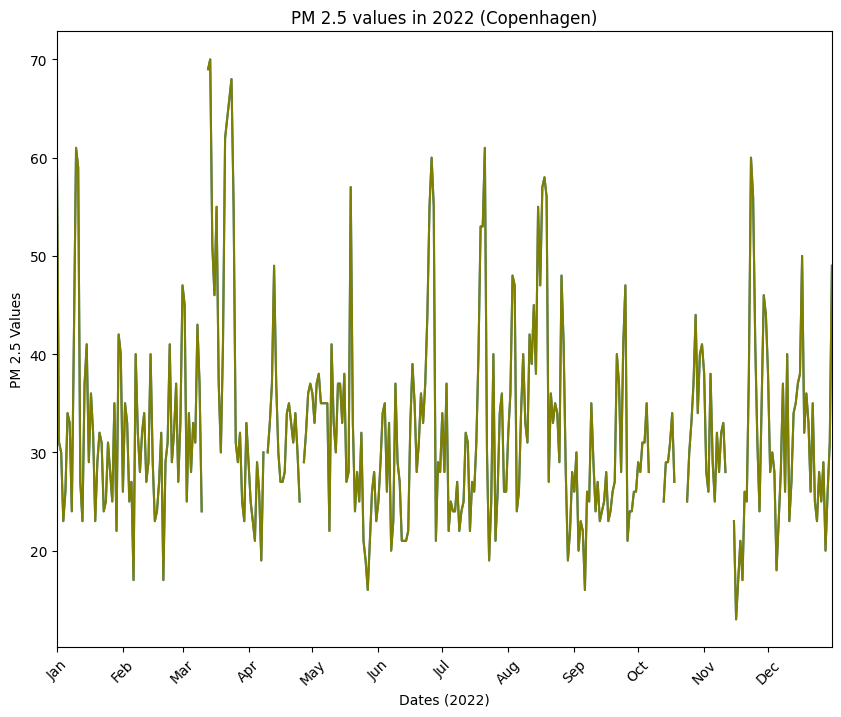

Minimum PM 10 value in 2022: 13.00 (Date: 2022-11-15)
Maximum PM 10 value in 2022: 70.00 (Date: 2022-03-13)
Median PM 10 value in 2022: 31.00


In [77]:
# P5-PM 2.5 (22)
# Plotting the data
# 5-2a. Copenhagen, Denmark (PM2.5) - 2022 year

df5a_2022 = data55a_pm25_2022
df5a_2022_dates = pd.to_datetime(df5a_2022['date'])
df5a_2022_pm25 = df5a_2022['PM 2.5']
df5a_2022_pm25 = [float(i) for i in df5a_2022_pm25]

plt.figure(figsize=(10, 8))

plt.plot(df5a_2022_dates, df5a_2022_pm25)
plt.title('PM 2.5 values in 2022 (Copenhagen)')
plt.xlabel('Dates (2022)')
plt.ylabel('PM 2.5 Values')

df5a_2022_months = mdates.MonthLocator()
df5a_2022_months_fmt = mdates.DateFormatter('%b')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(df5a_2022_months)
plt.gca().xaxis.set_major_formatter(df5a_2022_months_fmt)

plt.plot(df5a_2022_dates, df5a_2022_pm25, color="#808000")
plt.xlim(pd.to_datetime('2022-01-01'), pd.to_datetime('2022-12-31'))

#plt.savefig('df5a_2022_pm25.png')
plt.show()

df5a_2022_pm25_series = pd.Series(df5a_2022_pm25)

df5a_2022_pm25_min = df5a_2022_pm25_series.min()
df5a_2022_pm25_max = df5a_2022_pm25_series.max()
df5a_2022_pm25_median = round(df5a_2022_pm25_series.median(), 2)

df5a_2022_pm25_series = pd.Series(df5a_2022_pm25)

df5a_2022_pm25_min = df5a_2022_pm25_series.min()
df5a_2022_pm25_max = df5a_2022_pm25_series.max()
df5a_2022_pm25_median = round(df5a_2022_pm25_series.median(), 2)

df5a_2022_min_index = df5a_2022_pm25_series.idxmin()
df5a_2022_max_index = df5a_2022_pm25_series.idxmax()

df5a_2022_min_date = df5a_2022_dates[df5a_2022_min_index]
df5a_2022_max_date = df5a_2022_dates[df5a_2022_max_index]

df5a_2022_max_date = pd.to_datetime(df5a_2022_max_date).strftime('%Y-%m-%d')
df5a_2022_min_date = pd.to_datetime(df5a_2022_min_date).strftime('%Y-%m-%d')

print("Minimum PM 10 value in 2022: {:.2f} (Date: {})".format(df5a_2022_pm25_min, df5a_2022_min_date))
print("Maximum PM 10 value in 2022: {:.2f} (Date: {})".format(df5a_2022_pm25_max, df5a_2022_max_date))
print("Median PM 10 value in 2022: {:.2f}".format(df5a_2022_pm25_median))


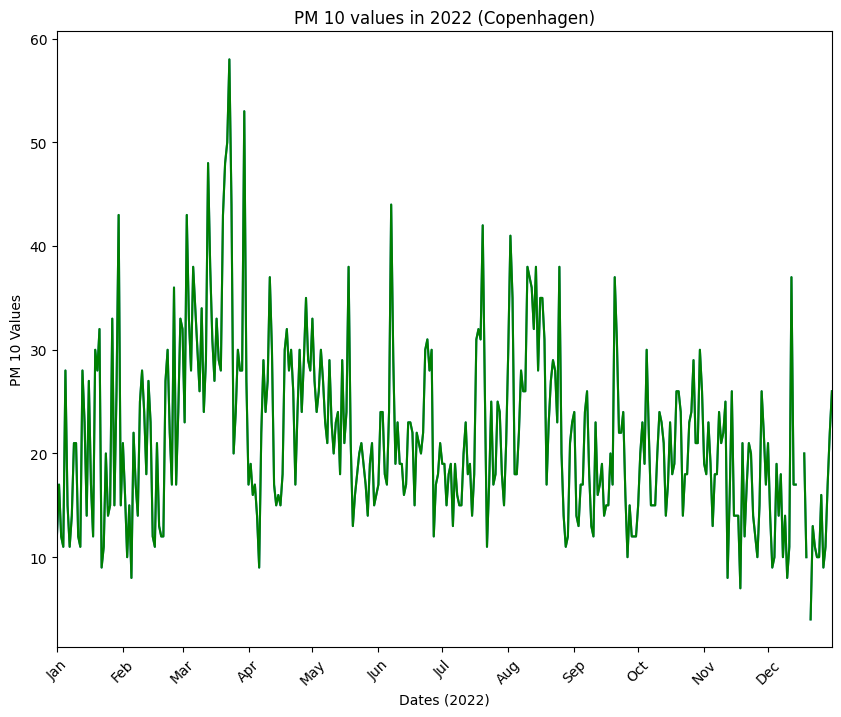

Minimum PM 10 value in 2022: 4.00 (Date: 2022-12-20)
Maximum PM 10 value in 2022: 58.00 (Date: 2022-03-22)
Median PM 10 value in 2022: 21.00


In [78]:
# P5-PM 10 (22)
# Plotting the data
# 5-2b. Copenhagen, Denmark (PM 10) - 2022 year

df5a_2022 = data55a_pm10_2022
df5a_2022_dates = pd.to_datetime(df5a_2022['date'])
df5a_2022_pm10 = df5a_2022['PM 10']
df5a_2022_pm10 = [float(i) for i in df5a_2022_pm10]

plt.figure(figsize=(10, 8))

plt.plot(df5a_2022_dates, df5a_2022_pm10)
plt.title('PM 10 values in 2022 (Copenhagen)')
plt.xlabel('Dates (2022)')
plt.ylabel('PM 10 Values')

df5a_2022_months = mdates.MonthLocator()
df5a_2022_months_fmt = mdates.DateFormatter('%b')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(df5a_2022_months)
plt.gca().xaxis.set_major_formatter(df5a_2022_months_fmt)

plt.plot(df5a_2022_dates, df5a_2022_pm10, color="#008000")
plt.xlim(pd.to_datetime('2022-01-01'), pd.to_datetime('2022-12-31'))
#plt.savefig('df5a_2022_pm10.png')
plt.show()

df5a_2022_pm10_series = pd.Series(df5a_2022_pm10)

df5a_2022_pm10_min = df5a_2022_pm10_series.min()
df5a_2022_pm10_max = df5a_2022_pm10_series.max()
df5a_2022_pm10_median = round(df5a_2022_pm10_series.median(), 2)

df5a_2022_min_index = df5a_2022_pm10_series.idxmin()
df5a_2022_max_index = df5a_2022_pm10_series.idxmax()

df5a_2022_min_date = df5a_2022_dates[df5a_2022_min_index]
df5a_2022_max_date = df5a_2022_dates[df5a_2022_max_index]

df5a_2022_max_date = pd.to_datetime(df5a_2022_max_date).strftime('%Y-%m-%d')
df5a_2022_min_date = pd.to_datetime(df5a_2022_min_date).strftime('%Y-%m-%d')

print("Minimum PM 10 value in 2022: {:.2f} (Date: {})".format(df5a_2022_pm10_min, df5a_2022_min_date))
print("Maximum PM 10 value in 2022: {:.2f} (Date: {})".format(df5a_2022_pm10_max, df5a_2022_max_date))
print("Median PM 10 value in 2022: {:.2f}".format(df5a_2022_pm10_median))


In [34]:
# G6-PM 10 (20)
# Getting the data
# 6. Risø, Denmark (PM10) 2020 year

file_path_6 = r'C:\Users\andrut\Desktop\Air Quality and Traffic Congestion Analysis in Denmark (between 2020 and 2022)\DATA\6. Risø, Denmark (PM10).csv'

data6 = pd.read_csv(file_path_6)

data6 = data6.rename(columns={" pm25": "PM 2.5",
                              " pm10": "PM 10",
                              " o3": "o3",
                              ' no2': 'no2',
                              ' so2': 'so2',
                              ' co': 'co'})

data6['date'] = pd.to_datetime(data6.date)

data66 = data6.loc[data6['date'] > '2019-12-31']
data66 = data66.loc[data6['date'] < '2021-01-01']
data66 = data66.sort_values(by='date')
data66

data66.replace(' ', 'NaN', inplace=True)
data66.dropna(inplace=True)

data66 = data66.drop(["o3", "no2", "no2", "co", "PM 2.5"], axis=1)
data66 = data66.reset_index(drop=True)
data66.index = data66.index + 1


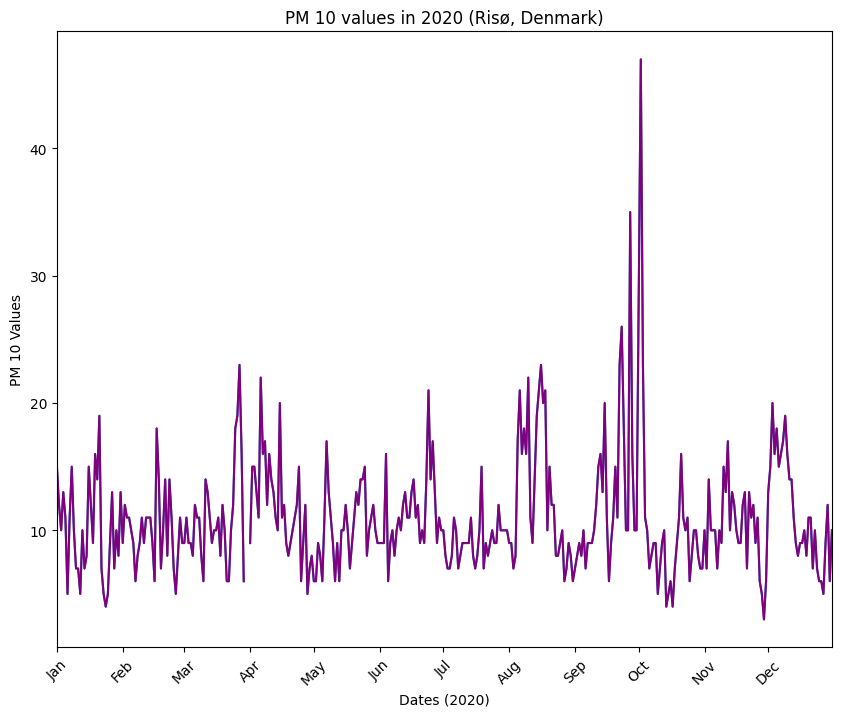

Minimum PM 10 value in 2020: 3.00 (Date: 2020-11-28)
Maximum PM 10 value in 2020: 47.00 (Date: 2020-10-01)
Median PM 10 value in 2020: 10.00


In [79]:
# P6-PM 10 (20)
# Plotting the data
# 6. Risø, Denmark PM 10 (2020)

df6_dates = pd.to_datetime(data66['date'])
df6_pm10 = data66['PM 10']
df6_pm10 = [float(i) for i in df6_pm10]

plt.figure(figsize=(10,8))

plt.plot(df6_dates, df6_pm10)
plt.title('PM 10 values in 2020 (Risø, Denmark)')
plt.xlabel('Dates (2020)')
plt.ylabel('PM 10 Values')

df6_months = mdates.MonthLocator() 
df6_months_fmt = mdates.DateFormatter('%b') 

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(df6_months)
plt.gca().xaxis.set_major_formatter(df6_months_fmt)

plt.plot(df6_dates, df6_pm10, color="#800080")
plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2020-12-31')) 
#plt.savefig('df6_pm10.png')
plt.show()

df6_pm10_series = pd.Series(df6_pm10)

df6_pm10_min = df6_pm10_series.min()
df6_pm10_max = df6_pm10_series.max()
df6_pm10_median = round(df6_pm10_series.median(), 2)

df6_min_index = df6_pm10_series.idxmin()
df6_max_index = df6_pm10_series.idxmax()

df6_min_date = df6_dates[df6_min_index]
df6_max_date = df6_dates[df6_max_index]

df6_max_date = pd.to_datetime(df6_max_date).strftime('%Y-%m-%d')
df6_min_date = pd.to_datetime(df6_min_date).strftime('%Y-%m-%d')

print("Minimum PM 10 value in 2020: {:.2f} (Date: {})".format(df6_pm10_min, df6_min_date))
print("Maximum PM 10 value in 2020: {:.2f} (Date: {})".format(df6_pm10_max, df6_max_date))
print("Median PM 10 value in 2020: {:.2f}".format(df6_pm10_median))


In [36]:
# G6-PM 10 (22)
# Getting the data
# 6a. Risø, Denmark (PM10) - 2022 year

file_path_6a = r'C:\Users\andrut\Desktop\Air Quality and Traffic Congestion Analysis in Denmark (between 2020 and 2022)\DATA\6. Risø, Denmark (PM10).csv'

data6a = pd.read_csv(file_path_6a)

data6a = data6a.rename(columns={" pm25": "PM 2.5",
                                " pm10": "PM 10",
                                " o3": "o3",
                                ' no2': 'no2',
                                ' so2': 'so2',
                                ' co': 'co'})

data6a['date'] = pd.to_datetime(data6a.date)

data66a = data6a.loc[data6a['date'] > '2021-12-31']
data66a = data66a.loc[data6a['date'] < '2023-01-01']
data66a = data66a.sort_values(by='date')

data66a.replace(' ', 'NaN', inplace=True)
data66a.dropna(inplace=True)
data66a = data66a.drop(["o3", "no2", "no2", "co", "PM 2.5"], axis=1)
data66a = data66a.reset_index(drop=True)
data66a.index = data66a.index + 1


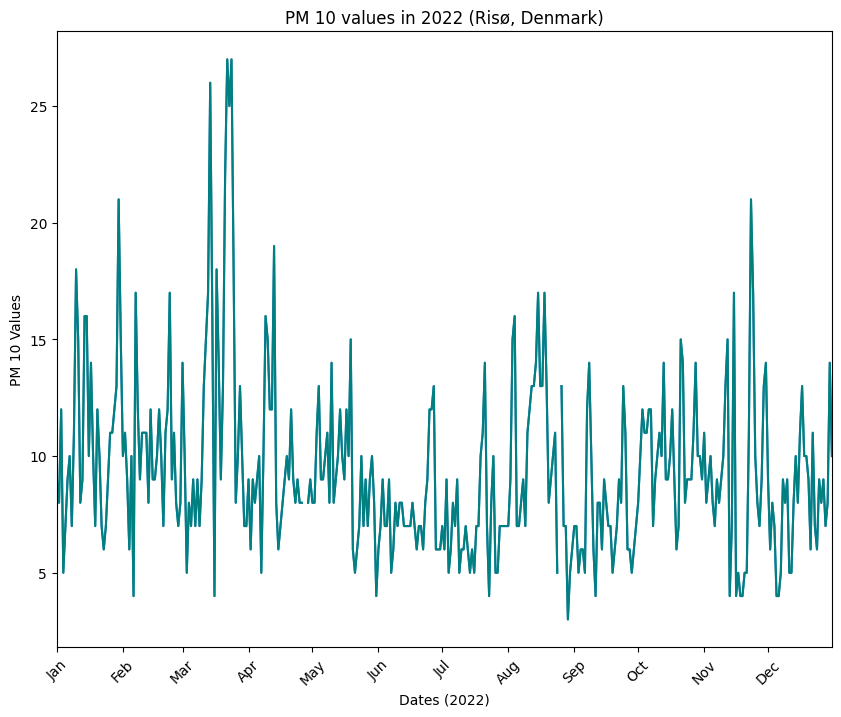

Minimum PM 10 value in 2022: 3.00 (Date: 2022-08-28)
Maximum PM 10 value in 2022: 27.00 (Date: 2022-03-21)
Median PM 10 value in 2022: 9.00


In [80]:
# P6-PM 10 (22)
# Plotting the data
# 6a. Risø, Denmark PM 10 (2022)

df6a_dates = pd.to_datetime(data66a['date'])
df6a_pm10 = data66a['PM 10']
df6a_pm10 = [float(i) for i in df6a_pm10]

plt.figure(figsize=(10, 8))

plt.plot(df6a_dates, df6a_pm10)
plt.title('PM 10 values in 2022 (Risø, Denmark)')
plt.xlabel('Dates (2022)')
plt.ylabel('PM 10 Values')

df6a_months = mdates.MonthLocator()
df6a_months_fmt = mdates.DateFormatter('%b')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(df6a_months)
plt.gca().xaxis.set_major_formatter(df6a_months_fmt)

plt.plot(df6a_dates, df6a_pm10, color="#008080")
plt.xlim(pd.to_datetime('2022-01-01'), pd.to_datetime('2022-12-31'))
#plt.savefig('df6a_pm10.png')
plt.show()

df6a_pm10_series = pd.Series(df6a_pm10)

df6a_pm10_min = df6a_pm10_series.min()
df6a_pm10_max = df6a_pm10_series.max()
df6a_pm10_median = round(df6a_pm10_series.median(), 2)

df6a_min_index = df6a_pm10_series.idxmin()
df6a_max_index = df6a_pm10_series.idxmax()

df6a_min_date = df6a_dates[df6a_min_index]
df6a_max_date = df6a_dates[df6a_max_index]

df6a_max_date = pd.to_datetime(df6a_max_date).strftime('%Y-%m-%d')
df6a_min_date = pd.to_datetime(df6a_min_date).strftime('%Y-%m-%d')

print("Minimum PM 10 value in 2022: {:.2f} (Date: {})".format(df6a_pm10_min, df6a_min_date))
print("Maximum PM 10 value in 2022: {:.2f} (Date: {})".format(df6a_pm10_max, df6a_max_date))
print("Median PM 10 value in 2022: {:.2f}".format(df6a_pm10_median))


In [82]:
# G7-Traffic congestion (20)
# Getting the data
# 7. Traffic congestion (2020)

file_path_7 = r'C:\Users\andrut\Desktop\Air Quality and Traffic Congestion Analysis in Denmark (between 2020 and 2022)\DATA\7. Traffic Congestion - 2020.xlsx'

data7 = pd.read_excel(file_path_7)
data7.dropna(inplace=True)
data7 = data7[data7['TC'] != '-']

print(data7)


          date         TC
0   2020-01-01  23.444323
1   2020-01-02   4.083288
2   2020-01-03   6.970391
3   2020-01-04   5.818074
4   2020-01-05   5.685377
..         ...        ...
361 2020-12-27  32.403996
362 2020-12-28   5.431517
363 2020-12-29    6.59228
364 2020-12-30  25.158129
365 2020-12-31   9.772116

[336 rows x 2 columns]


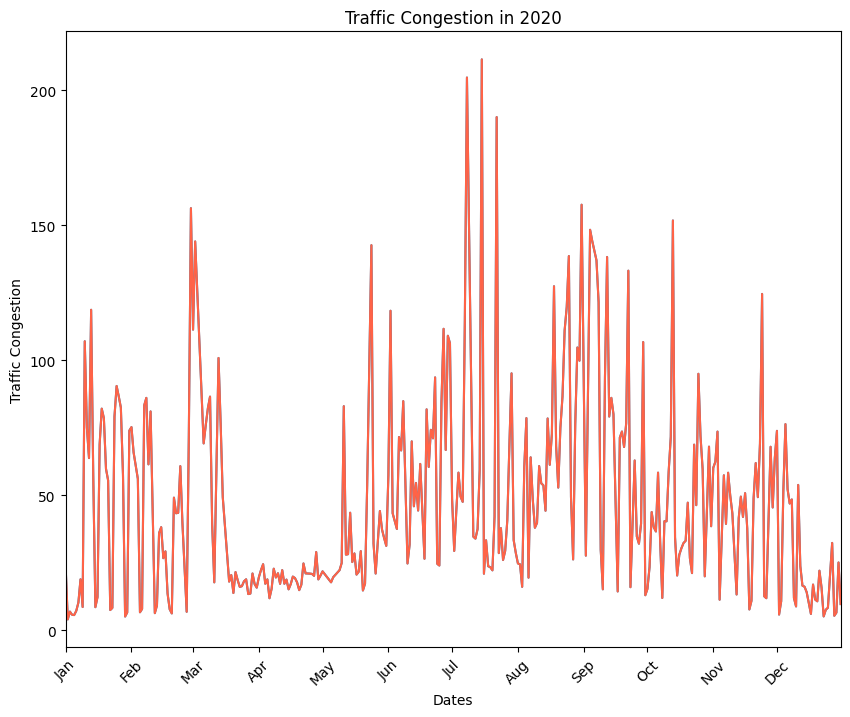

Minimum Traffic Congestion value in 2020: 4.08 (Date: 2020-01-02)
Maximum Traffic Congestion value in 2020: 211.46 (Date: 2020-06-25)
Median Traffic Congestion value in 2020:  38.23


In [84]:
# P7-Traffic congestion (20)
# Plotting the data
# 7. Traffic congestion (2020)

df7_dates = pd.to_datetime(data7['date'])
df7_tc = data7['TC']
df7_tc = [float(i) for i in df7_tc]

plt.figure(figsize=(10,8))

plt.plot(df7_dates, df7_tc)
plt.title('Traffic Congestion in 2020')
plt.xlabel('Dates')
plt.ylabel('Traffic Congestion')

df7_months = mdates.MonthLocator() 
df7_months_fmt = mdates.DateFormatter('%b') 

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(df7_months)
plt.gca().xaxis.set_major_formatter(df7_months_fmt)

plt.plot(df7_dates, df7_tc, color="#FF6347")
plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2020-12-31'))
#plt.savefig('df7_tc.png') 
plt.show()

df7_tc_series = pd.Series(df7_tc)

df7_tc_min = round(df7_tc_series.min(), 2)
df7_tc_max = round(df7_tc_series.max(), 2)
df7_tc_median = round(df7_tc_series.median(), 2)

df7_min_index = df7_tc_series.idxmin()
df7_max_index = df7_tc_series.idxmax()

df7_min_date = df7_dates[df7_min_index]
df7_max_date = df7_dates[df7_max_index]

df7_max_date = pd.to_datetime(df7_max_date).strftime('%Y-%m-%d')
df7_min_date = pd.to_datetime(df7_min_date).strftime('%Y-%m-%d')

print("Minimum Traffic Congestion value in 2020: {:.2f} (Date: {})".format(df7_tc_min, df7_min_date))
print("Maximum Traffic Congestion value in 2020: {:.2f} (Date: {})".format(df7_tc_max, df7_max_date))
print("Median Traffic Congestion value in 2020: ", df7_tc_median)


In [86]:
# G8-Traffic congestion (22)
# Getting the data
# 8. Traffic congestion (2022)

file_path_8 = r'C:\Users\andrut\Desktop\Air Quality and Traffic Congestion Analysis in Denmark (between 2020 and 2022)\DATA\8. Traffic Congestion - 2022.xlsx'

data8 = pd.read_excel(file_path_8)
data8.dropna(inplace=True)
data8 = data8[data8['TC'] != '-']

print(data8)


          date         TC
0   2022-01-01   7.974569
1   2022-01-02   6.030064
2   2022-01-03  27.215077
3   2022-01-04  44.175658
4   2022-01-05  21.281562
..         ...        ...
360 2022-12-27  33.545777
361 2022-12-28  61.802634
362 2022-12-29  54.034423
363 2022-12-30  21.695186
364 2022-12-31   7.171299

[364 rows x 2 columns]


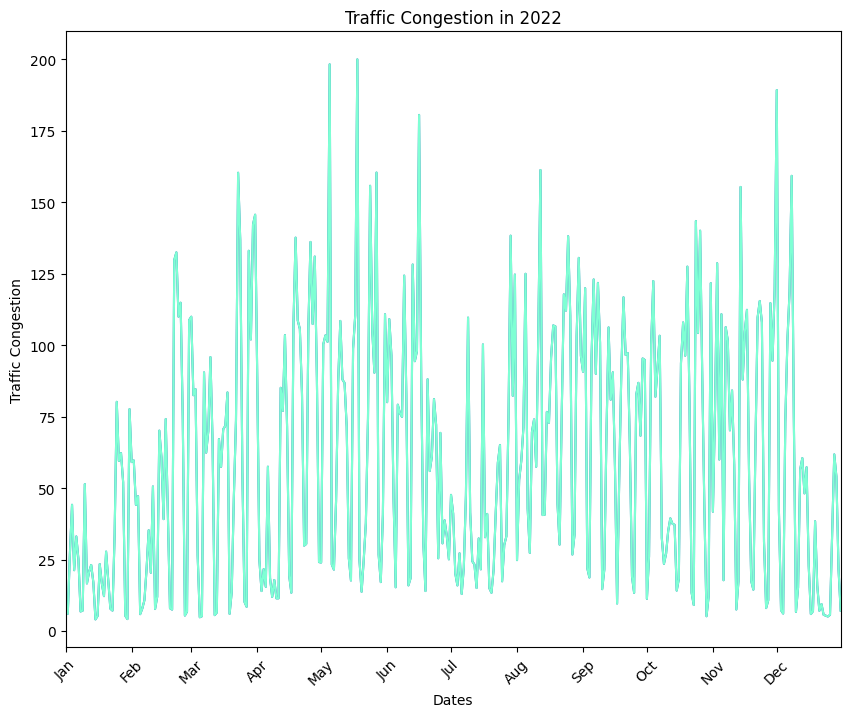

Minimum Traffic Congestion value in 2022: 4.07 (Date: 2022-01-15)
Maximum Traffic Congestion value in 2022: 200.02 (Date: 2022-05-17)
Median Traffic Congestion value in 2022: 56.93


In [87]:
# P8-Traffic congestion (22)
# Plotting the data
# 8. Traffic congestion (2022)

df8_dates = pd.to_datetime(data8['date'])
df8_tc = data8['TC']
df8_tc = [float(i) for i in df8_tc]

plt.figure(figsize=(10,8))

plt.plot(df8_dates, df8_tc)
plt.title('Traffic Congestion in 2022')
plt.xlabel('Dates')
plt.ylabel('Traffic Congestion')

df8_months = mdates.MonthLocator() 
df8_months_fmt = mdates.DateFormatter('%b') 

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(df8_months)
plt.gca().xaxis.set_major_formatter(df8_months_fmt)

plt.plot(df8_dates, df8_tc, color="#7FFFD4")
plt.xlim(pd.to_datetime('2022-01-01'), pd.to_datetime('2022-12-31')) 
#plt.savefig('df8_tc.png')
plt.show()

df8_tc_series = pd.Series(df8_tc)

df8_tc_min = round(df8_tc_series.min(), 2)
df8_tc_max = round(df8_tc_series.max(), 2)
df8_tc_median = round(df8_tc_series.median(), 2)

df8_min_index = df8_tc_series.idxmin()
df8_max_index = df8_tc_series.idxmax()

df8_min_date = df8_dates[df8_min_index]
df8_max_date = df8_dates[df8_max_index]

df8_min_date = pd.to_datetime(df8_min_date).strftime('%Y-%m-%d')
df8_max_date = pd.to_datetime(df8_max_date).strftime('%Y-%m-%d')

print("Minimum Traffic Congestion value in 2022: {:.2f} (Date: {})".format(df8_tc_min, df8_min_date))
print("Maximum Traffic Congestion value in 2022: {:.2f} (Date: {})".format(df8_tc_max, df8_max_date))
print("Median Traffic Congestion value in 2022: {:.2f}".format(df8_tc_median))


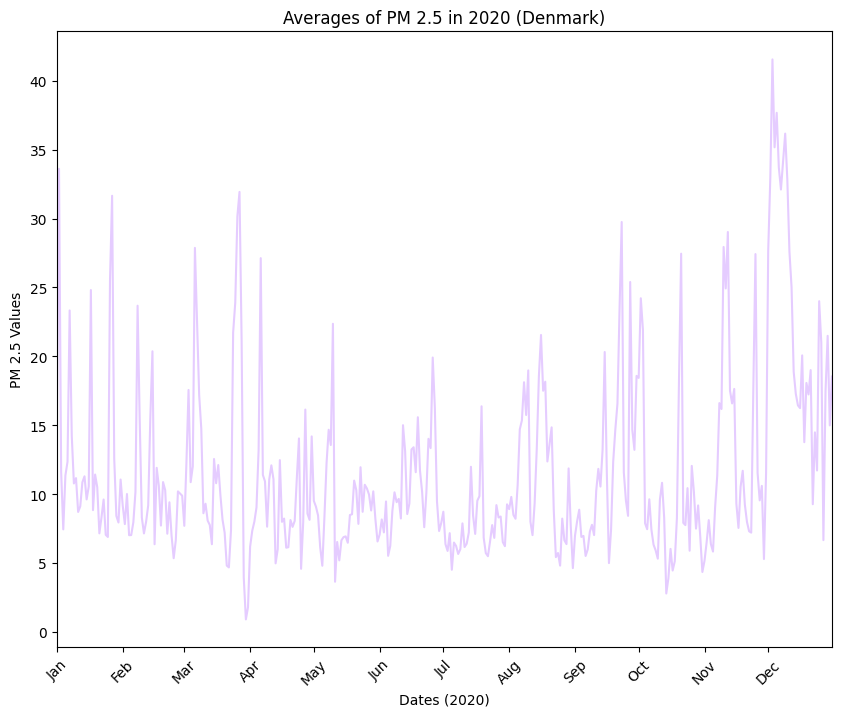

Minimum PM 2.5 value in 2020: 0.91 (Date: 2020-03-30)
Maximum PM 2.5 value in 2020: 41.55 (Date: 2020-12-03)
Median PM 2.5 value in 2020: 9.51


In [88]:
# PM2.5 in 2020
# Combining all the PM 2.5 values in Denmark, calculating averages, and plotting everything on a chart.

pm25_2020 = pd.concat([df1_2020, df2a_2020, df3_2020, df4_2020, data55_pm25_2020])

pm25_2020['date'] = pd.to_datetime(pm25_2020['date'])
pm25_2020['PM 2.5'] = pd.to_numeric(pm25_2020['PM 2.5'], errors='coerce')

averages_pm25_2020 = pm25_2020.groupby('date').mean()

plt.figure(figsize=(10, 8))
plt.plot(averages_pm25_2020.index, averages_pm25_2020['PM 2.5'], color="#E5CCFF")
plt.title('Averages of PM 2.5 in 2020 (Denmark)')
plt.xlabel('Dates (2020)')
plt.ylabel('PM 2.5 Values')

pm25_2020_months = mdates.MonthLocator()
pm25_2020_months_fmt = mdates.DateFormatter('%b')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(pm25_2020_months)
plt.gca().xaxis.set_major_formatter(pm25_2020_months_fmt)
plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2020-12-31'))
#plt.savefig('averages_pm25_2020.png')
plt.show()

pm25_2020_series = pd.Series(averages_pm25_2020['PM 2.5'])

pm25_2020_min = pm25_2020_series.min()
pm25_2020_max = pm25_2020_series.max()
pm25_2020_median = round(pm25_2020_series.median(), 2)

pm25_2020_min_date = pm25_2020_series.idxmin().strftime('%Y-%m-%d')
pm25_2020_max_date = pm25_2020_series.idxmax().strftime('%Y-%m-%d')

print("Minimum PM 2.5 value in 2020: {:.2f} (Date: {})".format(pm25_2020_min, pm25_2020_min_date))
print("Maximum PM 2.5 value in 2020: {:.2f} (Date: {})".format(pm25_2020_max, pm25_2020_max_date))
print("Median PM 2.5 value in 2020: {:.2f}".format(pm25_2020_median))


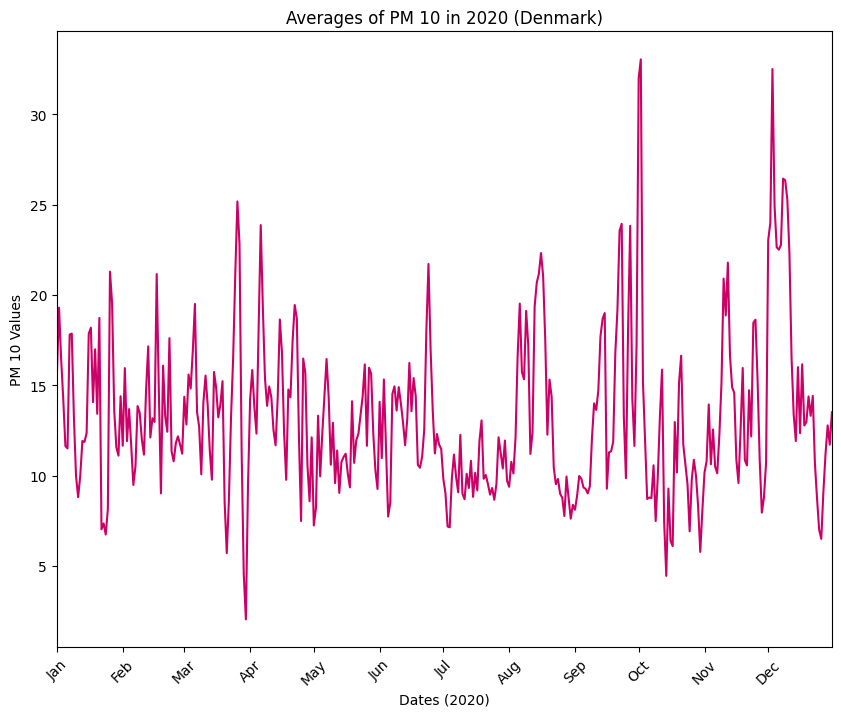

Minimum PM 10 value in 2020: 2.04 (Date: 2020-03-30)
Maximum PM 10 value in 2020: 33.04 (Date: 2020-10-02)
Median PM 10 value in 2020: 12.33


In [89]:
# PM 10 in 2020
# Combining all the PM 10 values in Denmark, calculating averages, and plotting everything on a chart.

pm10_2020 = pd.concat([df2_2020, data55_pm10_2020, data66])

pm10_2020['date'] = pd.to_datetime(pm10_2020['date'])
pm10_2020['PM 10'] = pd.to_numeric(pm10_2020['PM 10'], errors='coerce')

averages_pm10_2020 = pm10_2020.groupby('date').mean()

plt.figure(figsize=(10, 8))
plt.plot(averages_pm10_2020.index, averages_pm10_2020['PM 10'], color="#CC0066")
plt.title('Averages of PM 10 in 2020 (Denmark)')
plt.xlabel('Dates (2020)')
plt.ylabel('PM 10 Values')

pm10_2020_months = mdates.MonthLocator()
pm10_2020_months_fmt = mdates.DateFormatter('%b')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(pm10_2020_months)
plt.gca().xaxis.set_major_formatter(pm10_2020_months_fmt)
plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2020-12-31'))
#plt.savefig('averages_pm10_2020.png')
plt.show()

pm10_2020_series = pd.Series(averages_pm10_2020['PM 10'])

pm10_2020_min = pm10_2020_series.min()
pm10_2020_max = pm10_2020_series.max()
pm10_2020_median = round(pm10_2020_series.median(), 2)

pm10_2020_min_date = pm10_2020_series.idxmin().strftime('%Y-%m-%d')
pm10_2020_max_date = pm10_2020_series.idxmax().strftime('%Y-%m-%d')

print("Minimum PM 10 value in 2020: {:.2f} (Date: {})".format(pm10_2020_min, pm10_2020_min_date))
print("Maximum PM 10 value in 2020: {:.2f} (Date: {})".format(pm10_2020_max, pm10_2020_max_date))
print("Median PM 10 value in 2020: {:.2f}".format(pm10_2020_median))


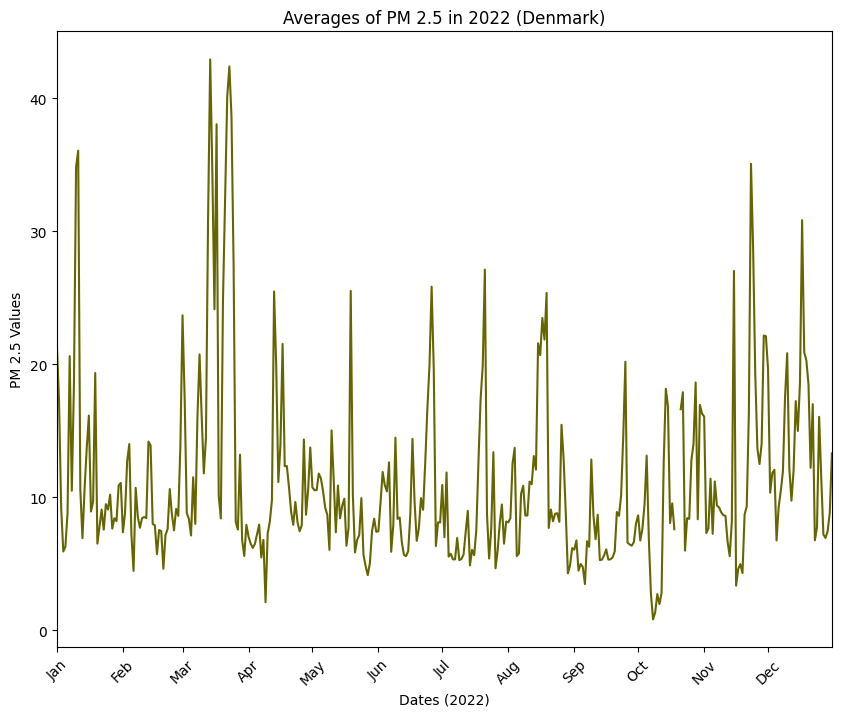

Minimum PM 2.5 value in 2022: 0.82 (Date: 2022-10-08)
Maximum PM 2.5 value in 2022: 42.91 (Date: 2022-03-14)
Median PM 2.5 value in 2022: 8.83


In [90]:
# PM2.5 in 2022
# Combining all the PM 2.5 values in Denmark, calculating averages, and plotting everything on a chart.

df1_2022, df2a_2022, df3_2022, df4_2022, data55a_pm25_2022

pm25_2022 = pd.concat([df1_2022, df2a_2022, df3_2022, df4_2022, data55a_pm25_2022])

pm25_2022['date'] = pd.to_datetime(pm25_2022['date'])
pm25_2022['PM 2.5'] = pd.to_numeric(pm25_2022['PM 2.5'], errors='coerce')

averages_pm25_2022 = pm25_2022.groupby('date').mean()

plt.figure(figsize=(10, 8))
plt.plot(averages_pm25_2022.index, averages_pm25_2022['PM 2.5'], color="#666600")
plt.title('Averages of PM 2.5 in 2022 (Denmark)')
plt.xlabel('Dates (2022)')
plt.ylabel('PM 2.5 Values')

pm25_2022_months = mdates.MonthLocator()
pm25_2022_months_fmt = mdates.DateFormatter('%b')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(pm25_2022_months)
plt.gca().xaxis.set_major_formatter(pm25_2022_months_fmt)
plt.xlim(pd.to_datetime('2022-01-01'), pd.to_datetime('2022-12-31')) 
#plt.savefig('averages_pm25_2022.png')
plt.show()

pm25_2022_series = pd.Series(averages_pm25_2022['PM 2.5'])

pm25_2022_min = pm25_2022_series.min()
pm25_2022_max = pm25_2022_series.max()
pm25_2022_median = round(pm25_2022_series.median(), 2)

pm25_2022_min_date = pm25_2022_series.idxmin().strftime('%Y-%m-%d')
pm25_2022_max_date = pm25_2022_series.idxmax().strftime('%Y-%m-%d')

print("Minimum PM 2.5 value in 2022: {:.2f} (Date: {})".format(pm25_2022_min, pm25_2022_min_date))
print("Maximum PM 2.5 value in 2022: {:.2f} (Date: {})".format(pm25_2022_max, pm25_2022_max_date))
print("Median PM 2.5 value in 2022: {:.2f}".format(pm25_2022_median))


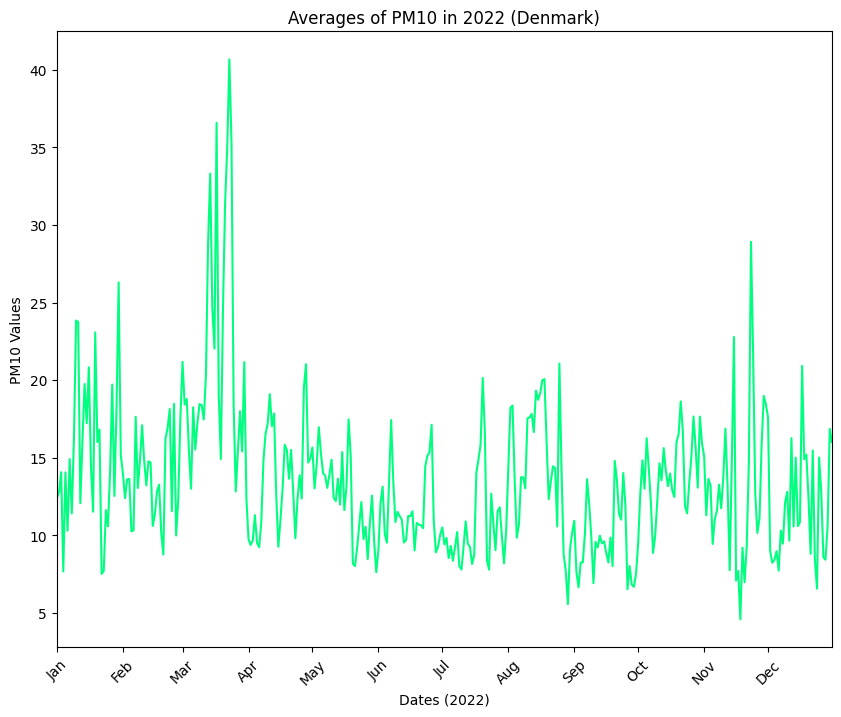

Minimum PM10 value in 2022: 4.57 (Date: 2022-11-18)
Maximum PM10 value in 2022: 40.68 (Date: 2022-03-23)
Median PM10 value in 2022: 12.82


In [91]:
# PM 10 in 2022
# Combining all the PM 10 values in Denmark, calculating averages, and plotting everything on a chart.

pm10_2022 = pd.concat([df2_2022, data55a_pm10_2022, data66a])

pm10_2022['date'] = pd.to_datetime(pm10_2022['date'])
pm10_2022['PM 10'] = pd.to_numeric(pm10_2022['PM 10'], errors='coerce')

averages_pm10_2022 = pm10_2022.groupby('date').mean()

plt.figure(figsize=(10, 8))
plt.plot(averages_pm10_2022.index, averages_pm10_2022['PM 10'], color="#00FF80")
plt.title('Averages of PM10 in 2022 (Denmark)')
plt.xlabel('Dates (2022)')
plt.ylabel('PM10 Values')

pm10_2022_months = mdates.MonthLocator()
pm10_2022_months_fmt = mdates.DateFormatter('%b')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(pm10_2022_months)
plt.gca().xaxis.set_major_formatter(pm10_2022_months_fmt)
plt.xlim(pd.to_datetime('2022-01-01'), pd.to_datetime('2022-12-31')) 
#plt.savefig('averages_pm10_2022.png')
plt.show()

pm10_2022_series = pd.Series(averages_pm10_2022['PM 10'])

pm10_2022_min = pm10_2022_series.min()
pm10_2022_max = pm10_2022_series.max()
pm10_2022_median = round(pm10_2022_series.median(), 2)

pm10_2022_min_date = pm10_2022_series.idxmin().strftime('%Y-%m-%d')
pm10_2022_max_date = pm10_2022_series.idxmax().strftime('%Y-%m-%d')

print("Minimum PM10 value in 2022: {:.2f} (Date: {})".format(pm10_2022_min, pm10_2022_min_date))
print("Maximum PM10 value in 2022: {:.2f} (Date: {})".format(pm10_2022_max, pm10_2022_max_date))
print("Median PM10 value in 2022: {:.2f}".format(pm10_2022_median))


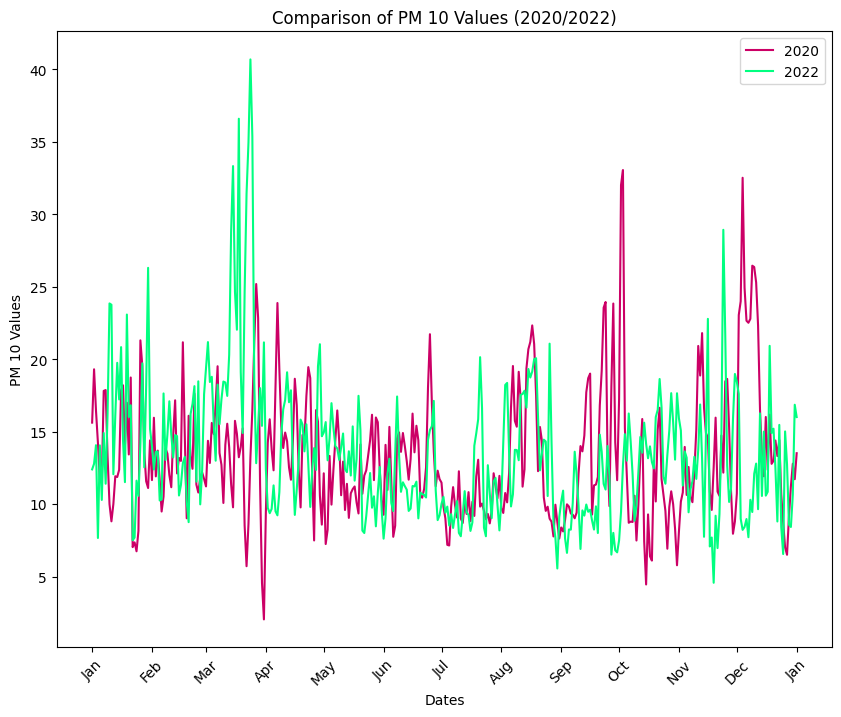

In [92]:
# Comparison PM 10 (2020/2022)
averages_pm10_2020['Month-Day'] = averages_pm10_2020.index.strftime('%m-%d')
averages_pm10_2022['Month-Day'] = averages_pm10_2022.index.strftime('%m-%d')

plt.figure(figsize=(10, 8))
plt.plot(averages_pm10_2020['Month-Day'], averages_pm10_2020['PM 10'], color="#CC0066", label='2020')
plt.plot(averages_pm10_2022['Month-Day'], averages_pm10_2022['PM 10'], color="#00FF80", label='2022')

plt.title('Comparison of PM 10 Values (2020/2022)')
plt.xlabel('Dates')
plt.ylabel('PM 10 Values')
plt.legend()

pm10_2022_months = mdates.MonthLocator()
pm10_2022_months_fmt = mdates.DateFormatter('%b')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(pm10_2022_months)
plt.gca().xaxis.set_major_formatter(pm10_2022_months_fmt)

plt.xticks(rotation=45)
#plt.savefig('Comparison_PM_10.png')

plt.show()


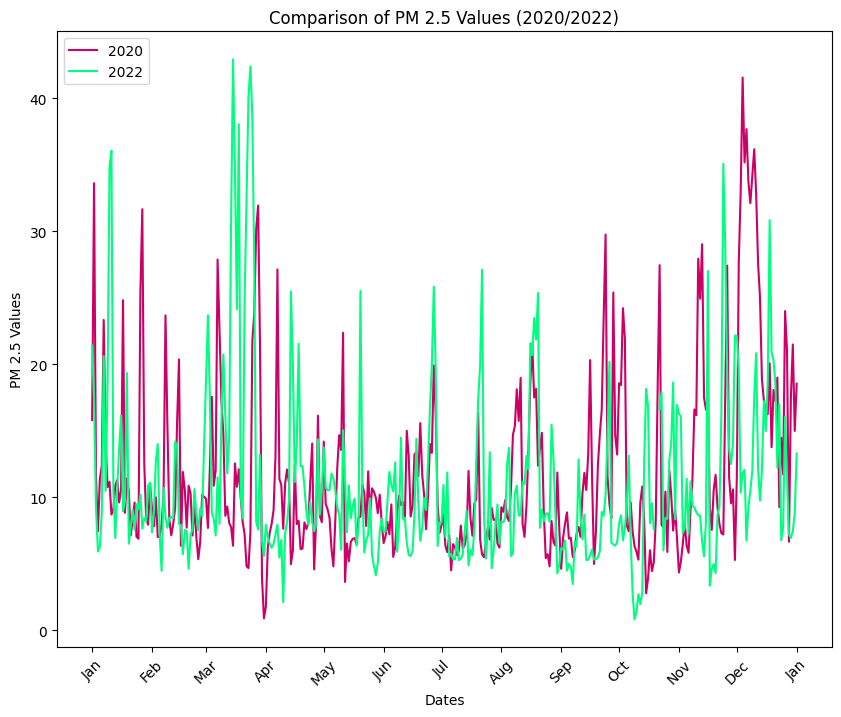

In [93]:
# Comparison PM 2.5 (2020/2022)
averages_pm25_2020['Month-Day'] = averages_pm25_2020.index.strftime('%m-%d')
averages_pm25_2022['Month-Day'] = averages_pm25_2022.index.strftime('%m-%d')

plt.figure(figsize=(10, 8))
plt.plot(averages_pm25_2020['Month-Day'], averages_pm25_2020['PM 2.5'], color="#CC0066", label='2020')
plt.plot(averages_pm25_2022['Month-Day'], averages_pm25_2022['PM 2.5'], color="#00FF80", label='2022')

plt.title('Comparison of PM 2.5 Values (2020/2022)')
plt.xlabel('Dates')
plt.ylabel('PM 2.5 Values')
plt.legend()

pm25_2022_months = mdates.MonthLocator()
pm25_2022_months_fmt = mdates.DateFormatter('%b')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(pm25_2022_months)
plt.gca().xaxis.set_major_formatter(pm25_2022_months_fmt)

#plt.savefig('Comparison_PM_25.png')

plt.show()


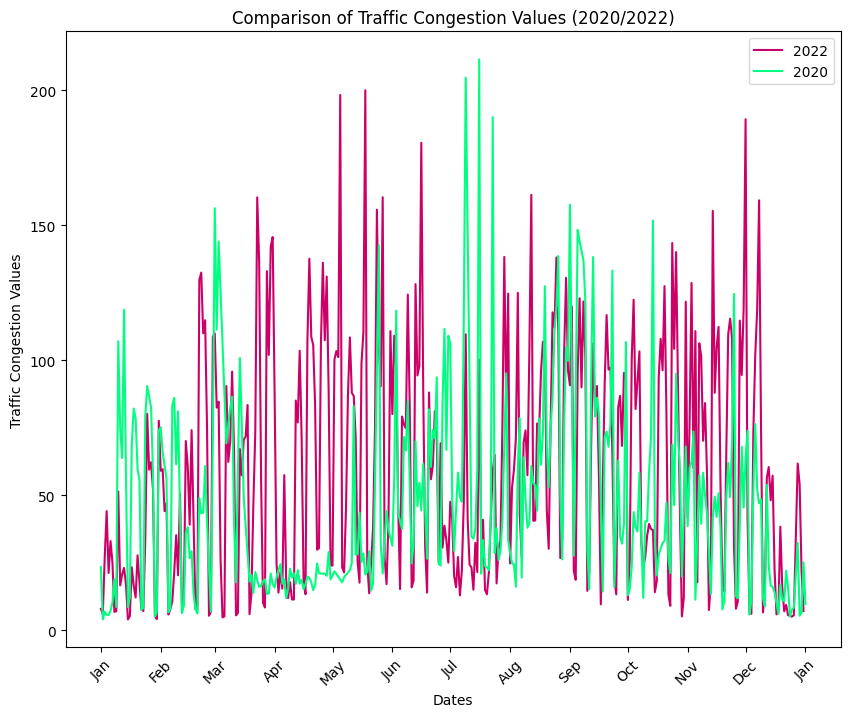

In [94]:
# Comparison Traffic Congestion (2020/2022)
plt.figure(figsize=(10, 8))
plt.plot(data8.index, data8['TC'], color="#CC0066", label='2022')
plt.plot(data7.index, data7['TC'], color="#00FF80", label='2020')

plt.title('Comparison of Traffic Congestion Values (2020/2022)')
plt.xlabel('Dates')
plt.ylabel('Traffic Congestion Values')
plt.legend()

tc_months = mdates.MonthLocator()
tc_months_fmt = mdates.DateFormatter('%b')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(tc_months)
plt.gca().xaxis.set_major_formatter(tc_months_fmt)

#plt.savefig('Comparison_TC.png')

plt.show()


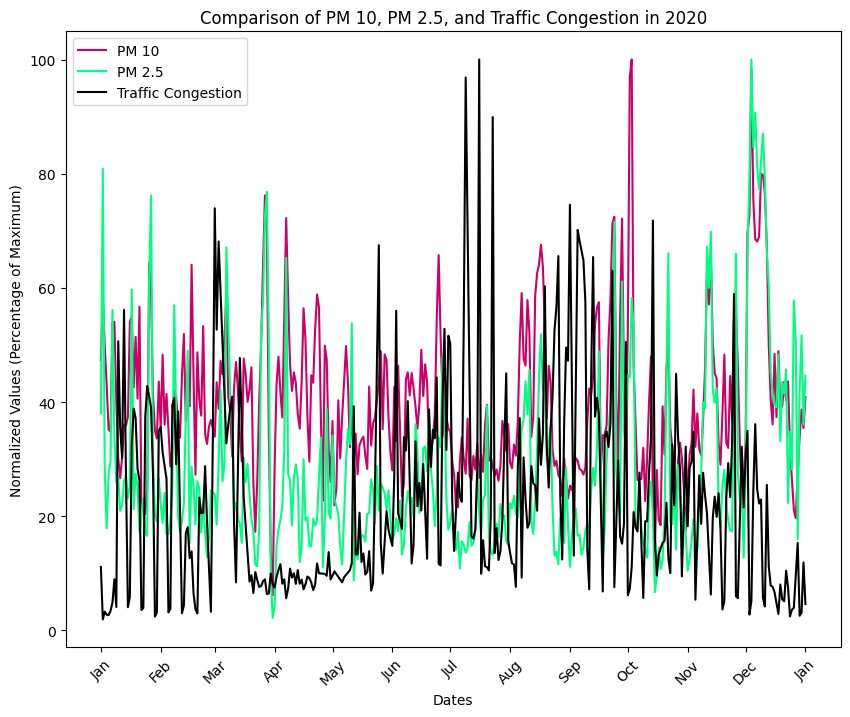

In [95]:
# Comparison (PM 10, PM 2.5, Traffic Congestion) in 2020
plt.figure(figsize=(10, 8))

# Values of PM 10, PM 2.5, and Traffic Congestion do not have a common unit, so to better understand and show them on the plot we decided to take each of these values as a percentage of the maximum value in 2020.
# Maximum PM 10 value in 2020: 33.04 (Date: 2020-10-02) - pm10_2020_max.
plt.plot(averages_pm10_2020['Month-Day'], averages_pm10_2020['PM 10']/33.04*100, color="#CC0066", label='PM 10')

# Maximum PM 2.5 value in 2020: 41.55 (Date: 2020-12-03) - pm25_2020_max.
plt.plot(averages_pm25_2020['Month-Day'], averages_pm25_2020['PM 2.5']/41.55*100, color="#00FF80", label='PM 2.5')

# Maximum Traffic Congestion value in 2020: 211.46 (Date: 2020-06-25) - df7_tc_max.
plt.plot(data7.index, data7['TC']/211.4*100, color="#000000", label='Traffic Congestion')

plt.title('Comparison of PM 10, PM 2.5, and Traffic Congestion in 2020')
plt.xlabel('Dates')
plt.ylabel('Normalized Values (Percentage of Maximum)')
plt.legend()

months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%b')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(months)
plt.gca().xaxis.set_major_formatter(months_fmt)
 
#plt.savefig('Comparison_all_2020.png')

plt.show()


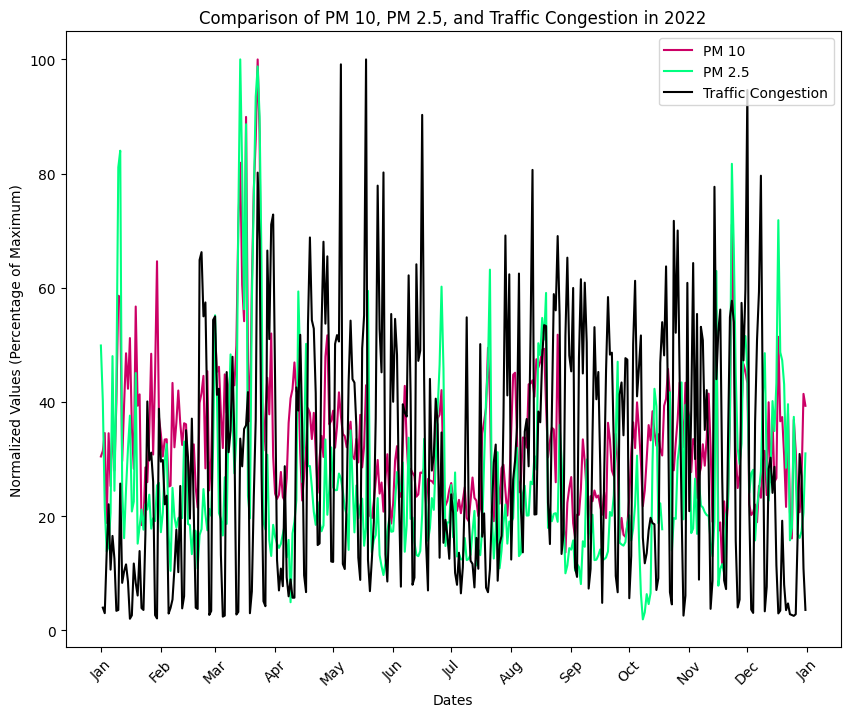

In [96]:
# Comparison (PM 10, PM 2.5, Traffic Congestion) in 2022
data8.index = pd.Index(range(1, 365), name='Day')

plt.figure(figsize=(10, 8))

# Values of PM 10, PM 2.5, and Traffic Congestion do not have a common unit, so to better understand and show them on the plot we decided to take each of these values as a percentage of the maximum value in 2022.
# Maximum PM 10 value in 2022: 40.68 (Date: 2022-03-23) - pm10_2022_max.
plt.plot(averages_pm10_2022['Month-Day'], averages_pm10_2022['PM 10']/40.68*100, color="#CC0066", label='PM 10')

# Maximum PM 2.5 value in 2022: 42.91 (Date: 2022-03-14) - pm25_2022_max.
plt.plot(averages_pm25_2022['Month-Day'], averages_pm25_2022['PM 2.5']/42.91*100, color="#00FF80", label='PM 2.5')

# Maximum Traffic Congestion value in 2022: 200.02 (Date: 2022-05-17) - df8_tc_max.
plt.plot(data8.index, data8['TC']/200.02*100, color="#000000", label='Traffic Congestion')

plt.title('Comparison of PM 10, PM 2.5, and Traffic Congestion in 2022')
plt.xlabel('Dates')
plt.ylabel('Normalized Values (Percentage of Maximum)')
plt.legend()

months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%b')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(months)
plt.gca().xaxis.set_major_formatter(months_fmt)

#plt.savefig('Comparison_all_2022.png')

plt.show()


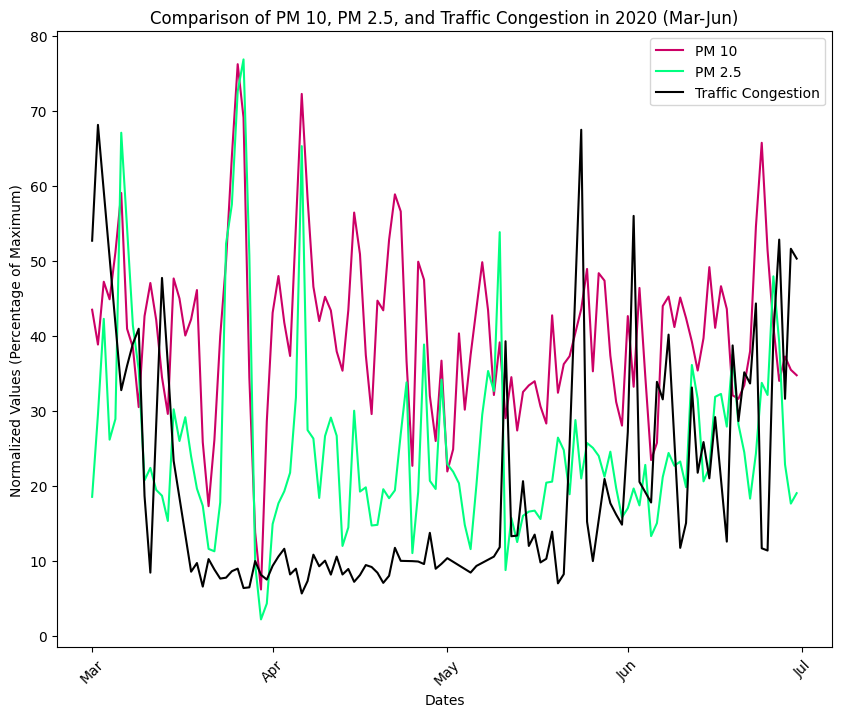

In [97]:
# Comparison (PM 10, PM 2.5, Traffic Congestion) in 2020 (March-June)
file_path_7 = r'C:\Users\andrut\Desktop\Air Quality and Traffic Congestion Analysis in Denmark (between 2020 and 2022)\DATA\7. Traffic Congestion - 2020.xlsx'

data7 = pd.read_excel(file_path_7)
data7.dropna(inplace=True)
data7 = data7[data7['TC'] != '-']

plt.figure(figsize=(10, 8))

# Values of PM 10 and PM 2.5 do not have a common unit, so to better understand and show them on the plot,
# we will represent each value as a percentage of its maximum value in 2020.

# Maximum PM 10 value in 2020: 33.04 (Date: 2020-10-02) - pm10_2020_max
pm10_values = averages_pm10_2020.loc['2020-03-01':'2020-06-30', 'PM 10']
pm10_values_normalized = pm10_values / 33.04 * 100
plt.plot(pm10_values.index, pm10_values_normalized, color="#CC0066", label='PM 10')

# Maximum PM 2.5 value in 2020: 41.55 (Date: 2020-12-03) - pm25_2020_max
pm25_values = averages_pm25_2020.loc['2020-03-01':'2020-06-30', 'PM 2.5']
pm25_values_normalized = pm25_values / 41.55 * 100
plt.plot(pm25_values.index, pm25_values_normalized, color="#00FF80", label='PM 2.5')

# Aligning the indices of PM 2.5 and Traffic Congestion
data7['date'] = pd.to_datetime(data7['date'])
data7.set_index('date', inplace=True)
data7 = data7['2020-03-01':'2020-06-30']
tc_values = data7['TC']
tc_values_normalized = tc_values / 211.46 * 100
plt.plot(tc_values.index, tc_values_normalized, color="#000000", label='Traffic Congestion')

plt.title('Comparison of PM 10, PM 2.5, and Traffic Congestion in 2020 (Mar-Jun)')
plt.xlabel('Dates')
plt.ylabel('Normalized Values (Percentage of Maximum)')
plt.legend()

months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%b')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(months)
plt.gca().xaxis.set_major_formatter(months_fmt)

#plt.savefig('Comparison_all_2020_mar_june.png')

plt.show()


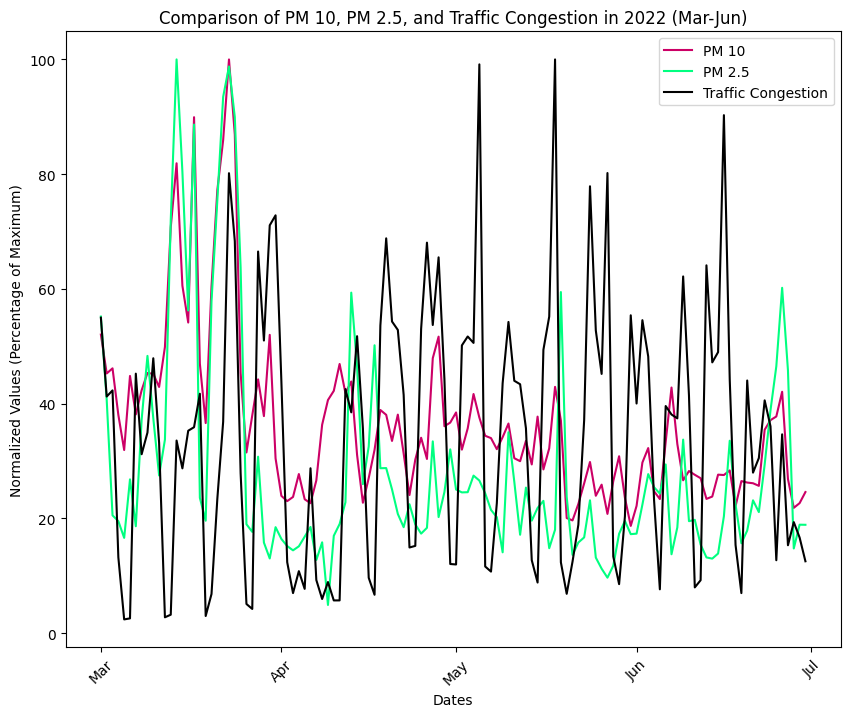

In [98]:
# Comparison (PM 10, PM 2.5, Traffic Congestion) in 2022 (March-June)
file_path_8 = r'C:\Users\andrut\Desktop\Air Quality and Traffic Congestion Analysis in Denmark (between 2020 and 2022)\DATA\8. Traffic Congestion - 2022.xlsx'

data8 = pd.read_excel(file_path_8)
data8.dropna(inplace=True)
data8 = data8[data8['TC'] != '-']
data8.index = pd.Index(range(1, 365), name='Day')

plt.figure(figsize=(10, 8))

# Values of PM 10 and PM 2.5 do not have a common unit, so to better understand and show them on the plot,
# we will represent each value as a percentage of its maximum value in 2022.

# Maximum PM 10 value in 2022: 40.68 (Date: 2022-03-23) - pm10_2022_max
pm10_values = averages_pm10_2022.loc['2022-03-01':'2022-06-30', 'PM 10']
pm10_values_normalized = pm10_values / 40.68 * 100
plt.plot(pm10_values.index, pm10_values_normalized, color="#CC0066", label='PM 10')

# Maximum PM 2.5 value in 2022: 42.91 (Date: 2022-03-14) - pm25_2022_max
pm25_values = averages_pm25_2022.loc['2022-03-01':'2022-06-30', 'PM 2.5']
pm25_values_normalized = pm25_values / 42.91 * 100
plt.plot(pm25_values.index, pm25_values_normalized, color="#00FF80", label='PM 2.5')

# Aligning the indices of PM 2.5 and Traffic Congestion
data8['date'] = pd.to_datetime(data8['date'])
data8.set_index('date', inplace=True)
data8 = data8['2022-03-01':'2022-06-30']
tc_values = data8['TC']
tc_values_normalized = tc_values / 200.02 * 100
plt.plot(tc_values.index, tc_values_normalized, color="#000000", label='Traffic Congestion')

plt.title('Comparison of PM 10, PM 2.5, and Traffic Congestion in 2022 (Mar-Jun)')
plt.xlabel('Dates')
plt.ylabel('Normalized Values (Percentage of Maximum)')
plt.legend()

months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%b')

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(months)
plt.gca().xaxis.set_major_formatter(months_fmt)

#plt.savefig('Comparison_all_2022_mar_june.png')

plt.show()